### USC ID  : 8534717045
### NAME   : SRINATH BEGUDEM
### GITHUB: SrinathBegudem

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')


# 1. Multi-class and Multi-Label Classification Using Support Vector Machines

### (a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.


In [2]:
frog_data = pd.read_csv('../data/Frogs_MFCCs.csv')

In [3]:
frog_data

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889   
7191       1.0 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628   
7192       1.0 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905   
7193       1.0 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866   
7194       1.0 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  \
0    -0.150063 -0.171128  0.124676  ... -0.108351 -0.077623 -0.009568   
1    -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303   
2    -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722   
3    -0.194347 -0.098181  0.270375  ... -0.136009 -0.177037 -0.130498   
4    -0.265423 -0.172700  0.266434  ... -0.048885 -0.053074 -0.088550   
...        ...       ...       ...  ...       ...       ...       ...   
7190 -0.100753  0.037087  0.081075  ...  0.069430  0.071001  0.021591   
7191 -0.116460  0.063727  0.089034  ...  0.061127  0.068978  0.017745   
7192 -0.103317  0.070370  0.081317  ...  0.082474  0.077771 -0.009688   
7193 -0.115799  0.056979  0.089316  ...  0.051796  0.069073  0.017963   
7194 -0.117672  0.058874  0.076180  ...  0.061455  0.072983 -0.003980   

      MFCCs_20  MFCCs_21  MFCCs_22           Family      Genus  \
0     0.057684  0.118680  0.014038  Leptodactylidae  Adenomera   
1     0.020140  0.082263  0.029056  Leptodactylidae  Adenomera   
2    -0.025083  0.099108  0.077162  Leptodactylidae  Adenomera   
3    -0.054766 -0.018691  0.023954  Leptodactylidae  Adenomera   
4    -0.031346  0.108610  0.079244  Leptodactylidae  Adenomera   
...        ...       ...       ...              ...        ...   
7190  0.052449 -0.021860 -0.079860          Hylidae     Scinax   
7191  0.046461 -0.015418 -0.101892          Hylidae     Scinax   
7192  0.027834 -0.000531 -0.080425          Hylidae     Scinax   
7193  0.041803 -0.027911 -0.096895          Hylidae     Scinax   
7194  0.031560 -0.029355 -0.087910          Hylidae     Scinax   

             Species  RecordID  
0     AdenomeraAndre         1  
1     AdenomeraAndre         1  
2     AdenomeraAndre         1  
3     AdenomeraAndre         1  
4     AdenomeraAndre         1  
...              ...       ...  
7190     ScinaxRuber        60  
7191     ScinaxRuber        60  
7192     ScinaxRuber        60  
7193     ScinaxRuber        60  
7194     ScinaxRuber        60  

[7195 rows x 26 columns]

In [4]:
frog_data.describe()

MFCCs_ 1     MFCCs_ 2     MFCCs_ 3     MFCCs_ 4     MFCCs_ 5  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000   
mean      0.989885     0.323584     0.311224     0.445997     0.127046   
std       0.069016     0.218653     0.263527     0.160328     0.162722   
min      -0.251179    -0.673025    -0.436028    -0.472676    -0.636012   
25%       1.000000     0.165945     0.138445     0.336737     0.051717   
50%       1.000000     0.302184     0.274626     0.481463     0.161361   
75%       1.000000     0.466566     0.430695     0.559861     0.222592   
max       1.000000     1.000000     1.000000     1.000000     0.752246   

          MFCCs_ 6     MFCCs_ 7     MFCCs_ 8     MFCCs_ 9     MFCCs_10  ...  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000  ...   
mean      0.097939    -0.001397    -0.000370     0.128213     0.055998  ...   
std       0.120412     0.171404     0.116302     0.179008     0.127099  ...   
min      -0.410417    -0.538982    -0.576506    -0.587313    -0.952266  ...   
25%       0.012581    -0.125737    -0.063109     0.004648    -0.001132  ...   
50%       0.072079    -0.052630     0.013265     0.189317     0.063478  ...   
75%       0.175957     0.085580     0.075108     0.265395     0.117725  ...   
max       0.964240     1.000000     0.551762     0.738033     0.522768  ...   

          MFCCs_14     MFCCs_15     MFCCs_16     MFCCs_17     MFCCs_18  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000   
mean     -0.039244    -0.101748     0.042062     0.088680     0.007755   
std       0.152515     0.187618     0.119915     0.138055     0.084733   
min      -0.590380    -0.717156    -0.498675    -0.421480    -0.759322   
25%      -0.132980    -0.255929    -0.019549    -0.001764    -0.042122   
50%      -0.050715    -0.143259     0.041081     0.112769     0.011820   
75%       0.039157     0.017348     0.107046     0.201932     0.061889   
max       0.575749     0.668924     0.670700     0.681157     0.614064   

          MFCCs_19     MFCCs_20     MFCCs_21     MFCCs_22     RecordID  
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000  
mean     -0.049474    -0.053244     0.037313     0.087567    25.220014  
std       0.082546     0.094181     0.079470     0.123442    13.214399  
min      -0.680745    -0.361649    -0.430812    -0.379304     1.000000  
25%      -0.106079    -0.120971    -0.017620     0.000533    15.000000  
50%      -0.052626    -0.055180     0.031274     0.105373    22.000000  
75%       0.006321     0.001342     0.089619     0.194819    37.000000  
max       0.574209     0.467831     0.389797     0.432207    60.000000  

[8 rows x 23 columns]

In [5]:
frog_data.groupby(['Family']).agg({'Family':['count']}).reset_index()

Family      
                   count
0        Bufonidae    68
1    Dendrobatidae   542
2          Hylidae  2165
3  Leptodactylidae  4420

In [6]:
# Different values in Genus column along with their counts of the entire data
frog_data.groupby(['Genus']).agg({'Genus':['count']}).reset_index()

Genus      
                 count
0      Adenomera  4150
1       Ameerega   542
2  Dendropsophus   310
3      Hypsiboas  1593
4  Leptodactylus   270
5  Osteocephalus   114
6       Rhinella    68
7         Scinax   148

In [7]:
# Different values in Species column along with their counts of the entire data
frog_data.groupby(['Species']).agg({'Species':['count']}).reset_index()

Species      
                          count
0          AdenomeraAndre   672
1  AdenomeraHylaedactylus  3478
2      Ameeregatrivittata   542
3              HylaMinuta   310
4    HypsiboasCinerascens   472
5       HypsiboasCordobae  1121
6     LeptodactylusFuscus   270
7   OsteocephalusOophagus   114
8       Rhinellagranulosa    68
9             ScinaxRuber   148

In [8]:
# Different combination of values in Family, Genus and Species columns along with their counts of the entire data
frog_data.groupby(['Family','Genus','Species']).agg({'Family':['count'],'Genus':['count'],'Species':['count']}).reset_index()

Family          Genus                 Species Family Genus Species
                                                           count count   count
0        Bufonidae       Rhinella       Rhinellagranulosa     68    68      68
1    Dendrobatidae       Ameerega      Ameeregatrivittata    542   542     542
2          Hylidae  Dendropsophus              HylaMinuta    310   310     310
3          Hylidae      Hypsiboas    HypsiboasCinerascens    472   472     472
4          Hylidae      Hypsiboas       HypsiboasCordobae   1121  1121    1121
5          Hylidae  Osteocephalus   OsteocephalusOophagus    114   114     114
6          Hylidae         Scinax             ScinaxRuber    148   148     148
7  Leptodactylidae      Adenomera          AdenomeraAndre    672   672     672
8  Leptodactylidae      Adenomera  AdenomeraHylaedactylus   3478  3478    3478
9  Leptodactylidae  Leptodactylus     LeptodactylusFuscus    270   270     270

In [9]:
num_rows_data = len(frog_data)
random.seed(num_rows_data)
indices_data = list(range(num_rows_data))

train_size_data = int(num_rows_data * 0.7)
train_indices_data = random.sample(indices_data, train_size_data)

test_indices_data = [i for i in indices_data if i not in train_indices_data]

train_data = frog_data.iloc[train_indices_data, :].reset_index(drop=True)
test_data = frog_data.iloc[test_indices_data, :].reset_index(drop=True)

train_features = train_data.iloc[:, :-4]
test_features = test_data.iloc[:, :-4]


In [10]:
train_data


MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.377944  0.429383  0.601528  0.099087  0.000388 -0.062059   
1          1.0  0.632191  0.687750  0.402632 -0.007152  0.116553 -0.005369   
2          1.0  0.553265  0.434453  0.169304 -0.001479  0.190652  0.065757   
3          1.0  0.312874 -0.141600  0.306529  0.464158  0.191441 -0.212280   
4          1.0  0.412758  0.284958  0.590299  0.182816 -0.020608 -0.097203   
...        ...       ...       ...       ...       ...       ...       ...   
5031       1.0  0.687587  0.344193  0.525968  0.152937  0.036198 -0.063721   
5032       1.0  0.114143  0.137175  0.527703  0.266414  0.062074 -0.145242   
5033       1.0  0.076123  0.124052  0.415311  0.058236 -0.047065 -0.114241   
5034       1.0  0.533323  0.276118  0.469194  0.155438  0.098326 -0.024866   
5035       1.0 -0.094606  0.016582  0.312595  0.351775  0.042976 -0.080347   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  \
0     0.113173  0.358851  0.034239  ...  0.165731 -0.065993 -0.095989   
1     0.166537  0.178722 -0.284436  ... -0.114398  0.016819  0.054743   
2    -0.078337  0.093723  0.083821  ... -0.011292 -0.024166  0.014483   
3    -0.151945  0.159110  0.192428  ... -0.180885 -0.007287  0.081684   
4     0.132835  0.295032  0.001360  ...  0.158127 -0.003775 -0.084528   
...        ...       ...       ...  ...       ...       ...       ...   
5031  0.046665  0.157946 -0.041937  ...  0.163504  0.033788 -0.005774   
5032 -0.047732  0.202191  0.035884  ...  0.241585 -0.109394 -0.225168   
5033  0.052518  0.250506  0.062218  ...  0.142359  0.031473 -0.001897   
5034  0.083622  0.288264  0.071312  ...  0.159577  0.062651 -0.035049   
5035 -0.140123 -0.034950  0.173305  ... -0.169406 -0.185060 -0.049836   

      MFCCs_20  MFCCs_21  MFCCs_22           Family      Genus  \
0    -0.056341  0.082675  0.169519  Leptodactylidae  Adenomera   
1     0.096869  0.011300 -0.227317          Hylidae  Hypsiboas   
2    -0.032372 -0.010227  0.053640          Hylidae  Hypsiboas   
3     0.041302 -0.064581 -0.047451    Dendrobatidae   Ameerega   
4    -0.172696 -0.004612  0.226103  Leptodactylidae  Adenomera   
...        ...       ...       ...              ...        ...   
5031 -0.052323 -0.001127  0.181899  Leptodactylidae  Adenomera   
5032 -0.078060  0.177229  0.208323  Leptodactylidae  Adenomera   
5033 -0.093859  0.035332  0.102104  Leptodactylidae  Adenomera   
5034 -0.108595  0.011458  0.222751  Leptodactylidae  Adenomera   
5035  0.137091  0.156349 -0.098010  Leptodactylidae  Adenomera   

                     Species  RecordID  
0     AdenomeraHylaedactylus        19  
1       HypsiboasCinerascens        36  
2          HypsiboasCordobae        42  
3         Ameeregatrivittata        11  
4     AdenomeraHylaedactylus        23  
...                      ...       ...  
5031  AdenomeraHylaedactylus        22  
5032  AdenomeraHylaedactylus        24  
5033  AdenomeraHylaedactylus        18  
5034  AdenomeraHylaedactylus        22  
5035          AdenomeraAndre         4  

[5036 rows x 26 columns]

In [11]:
test_data


MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
1          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
2          1.0  0.145130 -0.033660  0.284166  0.279537  0.175211  0.005791   
3          1.0  0.271326  0.027777  0.375738  0.385432  0.272457  0.098192   
4          1.0  0.120565 -0.107235  0.316555  0.364437  0.307757  0.025992   
...        ...       ...       ...       ...       ...       ...       ...   
2154       1.0 -0.512599 -0.171956  0.325813  0.169600  0.421567 -0.123749   
2155       1.0 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889   
2156       1.0 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628   
2157       1.0 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905   
2158       1.0 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  \
0    -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303   
1    -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722   
2    -0.183329 -0.158483  0.192567  ... -0.055978 -0.048219 -0.056637   
3    -0.173730 -0.157857  0.207181  ... -0.120723 -0.112607 -0.156933   
4    -0.294179 -0.223236  0.268435  ... -0.051073 -0.052568 -0.111338   
...        ...       ...       ...  ...       ...       ...       ...   
2154 -0.298284  0.089382  0.243902  ...  0.021225  0.157321  0.042847   
2155 -0.100753  0.037087  0.081075  ...  0.069430  0.071001  0.021591   
2156 -0.116460  0.063727  0.089034  ...  0.061127  0.068978  0.017745   
2157 -0.103317  0.070370  0.081317  ...  0.082474  0.077771 -0.009688   
2158 -0.115799  0.056979  0.089316  ...  0.051796  0.069073  0.017963   

      MFCCs_20  MFCCs_21  MFCCs_22           Family      Genus  \
0     0.020140  0.082263  0.029056  Leptodactylidae  Adenomera   
1    -0.025083  0.099108  0.077162  Leptodactylidae  Adenomera   
2    -0.022419  0.070085  0.021419  Leptodactylidae  Adenomera   
3    -0.118527 -0.002471  0.002304  Leptodactylidae  Adenomera   
4    -0.040014  0.090204  0.088025  Leptodactylidae  Adenomera   
...        ...       ...       ...              ...        ...   
2154  0.006852  0.005439 -0.013693          Hylidae     Scinax   
2155  0.052449 -0.021860 -0.079860          Hylidae     Scinax   
2156  0.046461 -0.015418 -0.101892          Hylidae     Scinax   
2157  0.027834 -0.000531 -0.080425          Hylidae     Scinax   
2158  0.041803 -0.027911 -0.096895          Hylidae     Scinax   

             Species  RecordID  
0     AdenomeraAndre         1  
1     AdenomeraAndre         1  
2     AdenomeraAndre         1  
3     AdenomeraAndre         1  
4     AdenomeraAndre         1  
...              ...       ...  
2154     ScinaxRuber        60  
2155     ScinaxRuber        60  
2156     ScinaxRuber        60  
2157     ScinaxRuber        60  
2158     ScinaxRuber        60  

[2159 rows x 26 columns]

### (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:
#### i. Research exact match and hamming score/ loss methods for evaluating multi- label classification and use them in evaluating the classifiers in this problem

**Answer:** 

**Exact Match:** 

- Denotes a perfect match when the predicted labels precisely correspond to the actual labels for a sample.
- A score of 1.0 signifies complete agreement.
- Conversely, a score of 0.0 indicates no alignment between predicted and actual label sets.

**Hamming Loss:**

- This metric is utilized for assessing multilabel classification tasks.
- It quantifies the average fraction of incorrectly predicted labels across all samples.
- Lower values of Hamming loss indicate superior model performance.
- The ideal score is 0.0, reflecting flawless predictions.


In [12]:
def calculate_multilabel_metrics(true_labels, predicted_labels):
    misclassifications_count = np.sum(true_labels.values != predicted_labels.values)
    hamming_loss_score = misclassifications_count / (true_labels.shape[0] * true_labels.shape[1])
    
    exact_match_ratio_score = np.sum(np.all(true_labels.values == predicted_labels.values, axis=1)) / true_labels.shape[0]
    
    hamming_loss_score = np.round(hamming_loss_score, 4)
    exact_match_ratio_score = np.round(exact_match_ratio_score, 4)
    
    print("Hamming Loss       :", hamming_loss_score)
    print("Exact Match Ratio  :", exact_match_ratio_score)
    return [hamming_loss_score, exact_match_ratio_score]


### ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation.1 You are welcome to try to solve the problem with both standardized 2 and raw attributes and report the results.

In [13]:
import pandas as pd

def calculate_multilabel_metrics(true_labels, predicted_labels):
    misclassifications_count = np.sum(true_labels.values != predicted_labels.values)
    hamming_loss_score = misclassifications_count / (true_labels.shape[0] * true_labels.shape[1])
    
    exact_match_ratio_score = np.sum(np.all(true_labels.values == predicted_labels.values, axis=1)) / true_labels.shape[0]
    
    hamming_loss_score = np.round(hamming_loss_score, 4)
    exact_match_ratio_score = np.round(exact_match_ratio_score, 4)
    
    print("Hamming Loss       :", hamming_loss_score)
    print("Exact Match Ratio  :", exact_match_ratio_score)
    return [hamming_loss_score, exact_match_ratio_score]

def evaluate_multilabel(test_features, true_labels, classifiers):
    predicted_labels = pd.DataFrame(index=true_labels.index, columns=true_labels.columns)
    for label_col in true_labels.columns:
        model = classifiers[label_col]
        predicted_values = model.predict(test_features)
        predicted_labels.loc[:, label_col] = predicted_values
    return calculate_multilabel_metrics(true_labels, predicted_labels)


In [14]:
def search_best_model_and_evaluate(classifier, grid_search_params, train_features, train_labels, test_features, test_labels):
    model = GridSearchCV(estimator=classifier, **grid_search_params, n_jobs=-1)
    model.fit(train_features, train_labels)
    
    param_results = {key: [] for key in model.cv_results_['params'][0].keys()}
    for param in model.cv_results_['params']:
        for key, value in param.items():
            param_results[key].append(value)            
    mean_test_scores = np.round(np.array(model.cv_results_['mean_test_score']), 5)
    param_results['mean_test_score'] = mean_test_scores
    result_data = pd.DataFrame(param_results)
    display(result_data)

    print("\nThe best parameter setting is:")
    print(model.best_params_, "\n")
    print(classification_report(test_labels, model.predict(test_features)))
    
    return model



In [15]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

svm_models_summary = {}  
evaluation_results_summary = {}  
svm_grid_search_params = {  
    'scoring': 'f1_weighted',
    'param_grid': {
        'C': np.logspace(1, 4, 4),
        'gamma': np.logspace(-3, 6, 10)
    },
    'cv': StratifiedKFold(10, random_state=5036, shuffle=True)
}
method_description = "SVM with RBF Kernel without Standardization" 


In [16]:
labels = ['Family', 'Genus', 'Species']

for label in labels:
    print("Method:", method_description)  
    print(f"Label: {label}")
    svm_models_summary[label] = search_best_model_and_evaluate(SVC(kernel='rbf'), svm_grid_search_params,  
                                                       train_features, train_data[label], test_features, test_data[label]) 

Method: SVM with RBF Kernel without Standardization
Label: Family


C        gamma  mean_test_score
0      10.0        0.001          0.86868
1      10.0        0.010          0.92583
2      10.0        0.100          0.97067
3      10.0        1.000          0.99121
4      10.0       10.000          0.98588
5      10.0      100.000          0.79105
6      10.0     1000.000          0.49178
7      10.0    10000.000          0.47178
8      10.0   100000.000          0.46983
9      10.0  1000000.000          0.46983
10    100.0        0.001          0.92492
11    100.0        0.010          0.94022
12    100.0        0.100          0.98216
13    100.0        1.000          0.99165
14    100.0       10.000          0.98588
15    100.0      100.000          0.79105
16    100.0     1000.000          0.49178
17    100.0    10000.000          0.47178
18    100.0   100000.000          0.46983
19    100.0  1000000.000          0.46983
20   1000.0        0.001          0.93655
21   1000.0        0.010          0.97056
22   1000.0        0.100          0.98594
23   1000.0        1.000          0.99146
24   1000.0       10.000          0.98588
25   1000.0      100.000          0.79105
26   1000.0     1000.000          0.49178
27   1000.0    10000.000          0.47178
28   1000.0   100000.000          0.46983
29   1000.0  1000000.000          0.46983
30  10000.0        0.001          0.95362
31  10000.0        0.010          0.98050
32  10000.0        0.100          0.98613
33  10000.0        1.000          0.99146
34  10000.0       10.000          0.98588
35  10000.0      100.000          0.79105
36  10000.0     1000.000          0.49178
37  10000.0    10000.000          0.47178
38  10000.0   100000.000          0.46983
39  10000.0  1000000.000          0.46983


The best parameter setting is:
{'C': 100.0, 'gamma': 1.0} 

                 precision    recall  f1-score   support

      Bufonidae       0.93      0.93      0.93        15
  Dendrobatidae       0.99      0.99      0.99       154
        Hylidae       0.99      0.98      0.99       673
Leptodactylidae       0.99      1.00      0.99      1317

       accuracy                           0.99      2159
      macro avg       0.98      0.98      0.98      2159
   weighted avg       0.99      0.99      0.99      2159

Method: SVM with RBF Kernel without Standardization
Label: Genus


C        gamma  mean_test_score
0      10.0        0.001          0.74367
1      10.0        0.010          0.91958
2      10.0        0.100          0.97326
3      10.0        1.000          0.98838
4      10.0       10.000          0.97950
5      10.0      100.000          0.73257
6      10.0     1000.000          0.44215
7      10.0    10000.000          0.42479
8      10.0   100000.000          0.42324
9      10.0  1000000.000          0.42324
10    100.0        0.001          0.91915
11    100.0        0.010          0.96507
12    100.0        0.100          0.98529
13    100.0        1.000          0.98947
14    100.0       10.000          0.97950
15    100.0      100.000          0.73257
16    100.0     1000.000          0.44215
17    100.0    10000.000          0.42479
18    100.0   100000.000          0.42324
19    100.0  1000000.000          0.42324
20   1000.0        0.001          0.96199
21   1000.0        0.010          0.97450
22   1000.0        0.100          0.98779
23   1000.0        1.000          0.98947
24   1000.0       10.000          0.97950
25   1000.0      100.000          0.73257
26   1000.0     1000.000          0.44215
27   1000.0    10000.000          0.42479
28   1000.0   100000.000          0.42324
29   1000.0  1000000.000          0.42324
30  10000.0        0.001          0.97135
31  10000.0        0.010          0.98289
32  10000.0        0.100          0.98677
33  10000.0        1.000          0.98947
34  10000.0       10.000          0.97950
35  10000.0      100.000          0.73257
36  10000.0     1000.000          0.44215
37  10000.0    10000.000          0.42479
38  10000.0   100000.000          0.42324
39  10000.0  1000000.000          0.42324


The best parameter setting is:
{'C': 100.0, 'gamma': 1.0} 

               precision    recall  f1-score   support

    Adenomera       0.99      1.00      1.00      1240
     Ameerega       0.99      0.99      0.99       154
Dendropsophus       0.97      0.95      0.96        91
    Hypsiboas       0.99      0.99      0.99       479
Leptodactylus       0.95      1.00      0.97        77
Osteocephalus       1.00      0.87      0.93        47
     Rhinella       1.00      0.93      0.97        15
       Scinax       1.00      0.98      0.99        56

     accuracy                           0.99      2159
    macro avg       0.99      0.96      0.97      2159
 weighted avg       0.99      0.99      0.99      2159

Method: SVM with RBF Kernel without Standardization
Label: Species


C        gamma  mean_test_score
0      10.0        0.001          0.79968
1      10.0        0.010          0.93474
2      10.0        0.100          0.97405
3      10.0        1.000          0.98762
4      10.0       10.000          0.97770
5      10.0      100.000          0.65635
6      10.0     1000.000          0.32970
7      10.0    10000.000          0.31375
8      10.0   100000.000          0.31194
9      10.0  1000000.000          0.31194
10    100.0        0.001          0.93494
11    100.0        0.010          0.96996
12    100.0        0.100          0.98463
13    100.0        1.000          0.98824
14    100.0       10.000          0.97770
15    100.0      100.000          0.65635
16    100.0     1000.000          0.32970
17    100.0    10000.000          0.31375
18    100.0   100000.000          0.31194
19    100.0  1000000.000          0.31194
20   1000.0        0.001          0.96936
21   1000.0        0.010          0.97905
22   1000.0        0.100          0.98568
23   1000.0        1.000          0.98824
24   1000.0       10.000          0.97770
25   1000.0      100.000          0.65635
26   1000.0     1000.000          0.32970
27   1000.0    10000.000          0.31375
28   1000.0   100000.000          0.31194
29   1000.0  1000000.000          0.31194
30  10000.0        0.001          0.97762
31  10000.0        0.010          0.98134
32  10000.0        0.100          0.98508
33  10000.0        1.000          0.98824
34  10000.0       10.000          0.97770
35  10000.0      100.000          0.65635
36  10000.0     1000.000          0.32970
37  10000.0    10000.000          0.31375
38  10000.0   100000.000          0.31194
39  10000.0  1000000.000          0.31194


The best parameter setting is:
{'C': 100.0, 'gamma': 1.0} 

                        precision    recall  f1-score   support

        AdenomeraAndre       0.99      0.98      0.99       182
AdenomeraHylaedactylus       0.99      1.00      1.00      1058
    Ameeregatrivittata       0.98      0.99      0.99       154
            HylaMinuta       0.97      0.95      0.96        91
  HypsiboasCinerascens       0.98      0.99      0.99       153
     HypsiboasCordobae       0.99      0.98      0.99       326
   LeptodactylusFuscus       0.97      1.00      0.99        77
 OsteocephalusOophagus       0.98      0.89      0.93        47
     Rhinellagranulosa       1.00      0.93      0.97        15
           ScinaxRuber       1.00      0.98      0.99        56

              accuracy                           0.99      2159
             macro avg       0.99      0.97      0.98      2159
          weighted avg       0.99      0.99      0.99      2159



In [17]:
print("Evaluation Summary:", method_description)  
evaluation_results_summary[method_description] = evaluate_multilabel(test_features, test_data.iloc[:, -4:-1], svm_models_summary)  


Evaluation Summary: SVM with RBF Kernel without Standardization
Hamming Loss       : 0.0096
Exact Match Ratio  : 0.9852


### iii. Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_features_std = scaler.fit_transform(train_features)
test_features_std = scaler.transform(test_features)


In [19]:
SVM_L1_classifiers_summary = {}  
grid_search_params_l1 = {  
    'scoring': 'f1_weighted',
    'param_grid': {'C': np.logspace(1, 5, 10)},
    'cv': StratifiedKFold(10, random_state=5036, shuffle=True)
}
method_l1_description = "SVM with L1-penalty"  


In [20]:
labels = ['Family', 'Genus', 'Species']

for label in labels:
    print("Method:", method_l1_description)  
    print(f"Label: {label}")
    SVM_L1_classifiers_summary[label] = search_best_model_and_evaluate( 
        LinearSVC(penalty='l1', dual=False, max_iter=30000),
        grid_search_params_l1,
        train_features_std,
        train_data[label],
        test_features_std,
        test_data[label]
    )


Method: SVM with L1-penalty
Label: Family


C  mean_test_score
0      10.000000          0.92821
1      27.825594          0.92801
2      77.426368          0.92801
3     215.443469          0.92801
4     599.484250          0.92801
5    1668.100537          0.92801
6    4641.588834          0.92801
7   12915.496650          0.92801
8   35938.136638          0.92801
9  100000.000000          0.92801


The best parameter setting is:
{'C': 10.0} 

                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        15
  Dendrobatidae       0.88      0.91      0.89       154
        Hylidae       0.94      0.90      0.92       673
Leptodactylidae       0.95      0.98      0.96      1317

       accuracy                           0.94      2159
      macro avg       0.69      0.70      0.69      2159
   weighted avg       0.93      0.94      0.94      2159

Method: SVM with L1-penalty
Label: Genus


C  mean_test_score
0      10.000000          0.94781
1      27.825594          0.94784
2      77.426368          0.94765
3     215.443469          0.94746
4     599.484250          0.94746
5    1668.100537          0.94746
6    4641.588834          0.94746
7   12915.496650          0.94746
8   35938.136638          0.94746
9  100000.000000          0.94746


The best parameter setting is:
{'C': 27.825594022071243} 

               precision    recall  f1-score   support

    Adenomera       0.96      0.99      0.98      1240
     Ameerega       0.93      0.95      0.94       154
Dendropsophus       0.94      0.65      0.77        91
    Hypsiboas       0.91      0.98      0.95       479
Leptodactylus       0.99      0.90      0.94        77
Osteocephalus       1.00      0.34      0.51        47
     Rhinella       0.92      0.73      0.81        15
       Scinax       0.94      0.91      0.93        56

     accuracy                           0.95      2159
    macro avg       0.95      0.81      0.85      2159
 weighted avg       0.95      0.95      0.94      2159

Method: SVM with L1-penalty
Label: Species


C  mean_test_score
0      10.000000          0.95849
1      27.825594          0.95868
2      77.426368          0.95868
3     215.443469          0.95868
4     599.484250          0.95888
5    1668.100537          0.95888
6    4641.588834          0.95888
7   12915.496650          0.95888
8   35938.136638          0.95888
9  100000.000000          0.95888


The best parameter setting is:
{'C': 599.4842503189409} 

                        precision    recall  f1-score   support

        AdenomeraAndre       0.90      0.93      0.92       182
AdenomeraHylaedactylus       0.98      1.00      0.99      1058
    Ameeregatrivittata       0.94      0.95      0.94       154
            HylaMinuta       0.93      0.69      0.79        91
  HypsiboasCinerascens       0.91      0.95      0.93       153
     HypsiboasCordobae       0.92      0.96      0.94       326
   LeptodactylusFuscus       0.96      0.92      0.94        77
 OsteocephalusOophagus       1.00      0.47      0.64        47
     Rhinellagranulosa       0.74      0.93      0.82        15
           ScinaxRuber       0.95      0.96      0.96        56

              accuracy                           0.95      2159
             macro avg       0.92      0.88      0.89      2159
          weighted avg       0.95      0.95      0.95      2159



In [21]:
print("Evaluation Summary:", method_l1_description)  
evaluation_results_summary[method_l1_description] = evaluate_multilabel(test_features_std, test_data.iloc[:, -4:-1], SVM_L1_classifiers_summary)


Evaluation Summary: SVM with L1-penalty
Hamming Loss       : 0.0528
Exact Match Ratio  : 0.9138


### iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [22]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

def search_best_model_with_smote(classifier, grid_search_params, train_x, train_y, test_x, test_y):
    smote_model = Pipeline([
        ('sampling', SMOTE()),
        ('classification', classifier)
    ])
    selected_model = search_best_model_and_evaluate(smote_model, grid_search_params, train_x, train_y, test_x, test_y)  
    return selected_model


In [23]:
SVC_smote_classifiers_summary = {}  
grid_search_params_smote = {
    'scoring': 'f1_weighted',
    'param_grid': {'classification__C': np.logspace(1, 5, 10)},
    'cv': StratifiedKFold(10, random_state=5036, shuffle=True),
}
method_smote_description = "SVM with SMOTE"  


In [24]:
for label in labels:
    print("Method:", method_smote_description)
    print(f"Label: {label}")
    SVC_smote_classifiers_summary[label] = search_best_model_with_smote(  
        LinearSVC(penalty='l1', dual=False, max_iter=30000),
        grid_search_params_smote,
        train_features_std,
        train_data[label],
        test_features_std,
        test_data[label]
    )


Method: SVM with SMOTE
Label: Family


classification__C  mean_test_score
0          10.000000          0.91999
1          27.825594          0.92233
2          77.426368          0.92026
3         215.443469          0.92054
4         599.484250          0.91871
5        1668.100537          0.92080
6        4641.588834          0.91995
7       12915.496650          0.91913
8       35938.136638          0.92163
9      100000.000000          0.92042


The best parameter setting is:
{'classification__C': 27.825594022071243} 

                 precision    recall  f1-score   support

      Bufonidae       0.26      0.93      0.41        15
  Dendrobatidae       0.80      0.98      0.88       154
        Hylidae       0.94      0.88      0.91       673
Leptodactylidae       0.97      0.95      0.96      1317

       accuracy                           0.93      2159
      macro avg       0.74      0.93      0.79      2159
   weighted avg       0.94      0.93      0.93      2159

Method: SVM with SMOTE
Label: Genus


classification__C  mean_test_score
0          10.000000          0.91952
1          27.825594          0.91781
2          77.426368          0.91722
3         215.443469          0.91780
4         599.484250          0.91808
5        1668.100537          0.91826
6        4641.588834          0.91761
7       12915.496650          0.91785
8       35938.136638          0.91823
9      100000.000000          0.91913


The best parameter setting is:
{'classification__C': 10.0} 

               precision    recall  f1-score   support

    Adenomera       0.98      0.93      0.95      1240
     Ameerega       0.84      0.93      0.88       154
Dendropsophus       0.69      0.86      0.76        91
    Hypsiboas       0.97      0.91      0.94       479
Leptodactylus       0.90      0.94      0.92        77
Osteocephalus       0.58      0.74      0.65        47
     Rhinella       0.27      0.87      0.41        15
       Scinax       0.86      0.98      0.92        56

     accuracy                           0.92      2159
    macro avg       0.76      0.89      0.80      2159
 weighted avg       0.94      0.92      0.92      2159

Method: SVM with SMOTE
Label: Species


classification__C  mean_test_score
0          10.000000          0.95655
1          27.825594          0.95602
2          77.426368          0.95691
3         215.443469          0.95625
4         599.484250          0.95553
5        1668.100537          0.95586
6        4641.588834          0.95655
7       12915.496650          0.95715
8       35938.136638          0.95627
9      100000.000000          0.95681


The best parameter setting is:
{'classification__C': 12915.496650148827} 

                        precision    recall  f1-score   support

        AdenomeraAndre       0.97      0.91      0.94       182
AdenomeraHylaedactylus       0.99      1.00      0.99      1058
    Ameeregatrivittata       0.93      0.92      0.93       154
            HylaMinuta       0.84      0.87      0.85        91
  HypsiboasCinerascens       0.92      0.94      0.93       153
     HypsiboasCordobae       0.95      0.91      0.93       326
   LeptodactylusFuscus       0.92      0.91      0.92        77
 OsteocephalusOophagus       0.82      0.70      0.76        47
     Rhinellagranulosa       0.41      0.93      0.57        15
           ScinaxRuber       0.89      0.96      0.92        56

              accuracy                           0.95      2159
             macro avg       0.86      0.91      0.87      2159
          weighted avg       0.96      0.95      0.95      2159



In [25]:
print("Evaluation Summary:", method_smote_description)
evaluation_results_summary[method_smote_description] = evaluate_multilabel(test_features_std, test_data.iloc[:, -4:-1], SVC_smote_classifiers_summary)


Evaluation Summary: SVM with SMOTE
Hamming Loss       : 0.0679
Exact Match Ratio  : 0.8675


In [26]:
print(evaluation_results_summary)


{'SVM with RBF Kernel without Standardization': [0.0096, 0.9852], 'SVM with L1-penalty': [0.0528, 0.9138], 'SVM with SMOTE': [0.0679, 0.8675]}


In [27]:
total_eval_summary = pd.DataFrame(data=evaluation_results_summary)


total_eval_summary.index = ['Hamming_Loss', 'Exact_Match_Ratio']



In [28]:
display(total_eval_summary)

SVM with RBF Kernel without Standardization  \
Hamming_Loss                                            0.0096   
Exact_Match_Ratio                                       0.9852   

                   SVM with L1-penalty  SVM with SMOTE  
Hamming_Loss                    0.0528          0.0679  
Exact_Match_Ratio               0.9138          0.8675

### Observations:
- Gaussian Kernel SVM demonstrates the highest Average Exact Match Loss.
- Both Average Exact Match Loss and Average Hamming Loss increase for the L1-Penalized SVM compared to Gaussian Kernel SVM.
- Introducing class balancing with SMOTE reduces the Average Exact Match Loss for L1-Penalized SVM.
- Overall, considering metrics like Average Exact Match Loss and Average Hamming Loss, Gaussian Kernel SVM outperforms other models.


# 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

## Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

### (a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.
### (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.
### (c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [29]:
def optimalK(k_start,k_end,X):
    maxScore = 0
    optimal_k = k_start
    for i in range(k_start, k_end+1):
        rand_value = random.randint(0, 900)
        kmeans = KMeans(n_clusters=i, random_state=rand_value)
        clusters = kmeans.fit_predict(X)
        silhouetteScore = silhouette_score(X, clusters)
        if silhouetteScore > maxScore:
            optimal_k = i
            maxScore = silhouetteScore
            
    print('The optimal K is', optimal_k, ' with silhouette score of : ', maxScore)
    return optimal_k

def clusterMajority(optimalK, Y_Actual, cluster_label):
    outputdict = {}
    for i in range(optimalK):
        outputdict[i] = []
        for column in Y_Actual.columns:
            cluster_i_index = np.where(cluster_label == i)
            cluster_i_label_values_counts = Y_Actual.loc[cluster_i_index, column].value_counts()
            cluster_i_label_max = pd.Series(cluster_i_label_values_counts[
                cluster_i_label_values_counts == max(cluster_i_label_values_counts)
            ].index)[0]
            outputdict[i].append(cluster_i_label_max)
    return outputdict

def clusterEval(Y_Actual, cluster_label, cluster_majority):
    outputdict = {}
    temp = 0
    total_labels = 0
    correct_class = 0
    for i in range(max(cluster_majority) + 1):
        cluster_i_index = np.where(cluster_label == i)            
        for row in Y_Actual.loc[cluster_i_index].values:
            total = np.size(row == cluster_majority[i])
            matching = np.count_nonzero(row == cluster_majority[i])
            temp = temp + (total - matching)
            correct_class += matching
            total_labels += total
    outputdict['Hamming_Loss'] = temp / (Y_Actual.shape[0] * Y_Actual.shape[1])
    outputdict['Hamming_Score'] = correct_class / (Y_Actual.shape[0] * Y_Actual.shape[1])
    outputdict['Hamming_Distance'] = temp / Y_Actual.shape[0]
    return outputdict

def monte_carlo_method(N, k_start, k_end, X, Y_Actual):
    score_list = {'Hamming_Loss':[], 'Hamming_Score':[], 'Hamming_Distance':[]}
    for i in range(N+1):
        print('\n\nMonte Carlo Simulation', i)
        optimal_k = optimalK(k_start, k_end, X)
        clusterer = KMeans(n_clusters=optimal_k)
        cluster_label = clusterer.fit_predict(X)
        cluster_label = pd.Series(cluster_label)
        cluster_majority = clusterMajority(optimal_k, Y_Actual, cluster_label)
        print('\n Cluster Majority for Monte Carlo Simulation ', i, ': ')
        
        cluster_maj = pd.DataFrame(cluster_majority, index=['Family', 'Genus', 'Species'])
        cluster_maj.columns = [f'Cluster {i}' for i in range(cluster_maj.shape[1])] # Dynamic column names
        display(cluster_maj)
        
        print('\n Evaluation Metrics for Monte Carlo Simulation ', i, ': ')
        out = clusterEval(Y_Actual, cluster_label, cluster_majority)
        display(pd.Series(out))
        score_list['Hamming_Loss'].append(out['Hamming_Loss'])
        score_list['Hamming_Score'].append(out['Hamming_Score'])
        score_list['Hamming_Distance'].append(out['Hamming_Distance'])
        print('--------------------------------------------------------------------------------------------------------------')
    return score_list

In [30]:
X = frog_data.iloc[:, :-4]
Y_Actual = frog_data.iloc[:, -4:-1]
Y_Actual.columns

score_list = monte_carlo_method(50, 2, 50, X, Y_Actual)



Monte Carlo Simulation 0
The optimal K is 6  with silhouette score of :  0.38033764635131334

 Cluster Majority for Monte Carlo Simulation  0 : 


Cluster 0               Cluster 1        Cluster 2  \
Family             Hylidae         Leptodactylidae  Leptodactylidae   
Genus            Hypsiboas               Adenomera        Adenomera   
Species  HypsiboasCordobae  AdenomeraHylaedactylus   AdenomeraAndre   

               Cluster 3             Cluster 4           Cluster 5  
Family   Leptodactylidae               Hylidae       Dendrobatidae  
Genus          Adenomera             Hypsiboas            Ameerega  
Species   AdenomeraAndre  HypsiboasCinerascens  Ameeregatrivittata


 Evaluation Metrics for Monte Carlo Simulation  0 : 


Hamming_Loss        0.165671
Hamming_Score       0.834329
Hamming_Distance    0.497012
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 1
The optimal K is 4  with silhouette score of :  0.3838734890243389

 Cluster Majority for Monte Carlo Simulation  1 : 


Cluster 0          Cluster 1           Cluster 2  \
Family          Leptodactylidae            Hylidae       Dendrobatidae   
Genus                 Adenomera          Hypsiboas            Ameerega   
Species  AdenomeraHylaedactylus  HypsiboasCordobae  Ameeregatrivittata   

                    Cluster 3  
Family                Hylidae  
Genus               Hypsiboas  
Species  HypsiboasCinerascens


 Evaluation Metrics for Monte Carlo Simulation  1 : 


Hamming_Loss        0.222330
Hamming_Score       0.777670
Hamming_Distance    0.666991
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 2
The optimal K is 6  with silhouette score of :  0.3757265845037681

 Cluster Majority for Monte Carlo Simulation  2 : 


Cluster 0             Cluster 1           Cluster 2  \
Family          Leptodactylidae               Hylidae       Dendrobatidae   
Genus                 Adenomera             Hypsiboas            Ameerega   
Species  AdenomeraHylaedactylus  HypsiboasCinerascens  Ameeregatrivittata   

                 Cluster 3               Cluster 4        Cluster 5  
Family             Hylidae         Leptodactylidae  Leptodactylidae  
Genus            Hypsiboas               Adenomera        Adenomera  
Species  HypsiboasCordobae  AdenomeraHylaedactylus   AdenomeraAndre


 Evaluation Metrics for Monte Carlo Simulation  2 : 


Hamming_Loss        0.168172
Hamming_Score       0.831828
Hamming_Distance    0.504517
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 3
The optimal K is 4  with silhouette score of :  0.3846609564232158

 Cluster Majority for Monte Carlo Simulation  3 : 


Cluster 0          Cluster 1          Cluster 2  \
Family          Leptodactylidae            Hylidae            Hylidae   
Genus                 Adenomera          Hypsiboas          Hypsiboas   
Species  AdenomeraHylaedactylus  HypsiboasCordobae  HypsiboasCordobae   

                      Cluster 3  
Family          Leptodactylidae  
Genus                 Adenomera  
Species  AdenomeraHylaedactylus


 Evaluation Metrics for Monte Carlo Simulation  3 : 


Hamming_Loss        0.298216
Hamming_Score       0.701784
Hamming_Distance    0.894649
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 4
The optimal K is 5  with silhouette score of :  0.37170236413433505

 Cluster Majority for Monte Carlo Simulation  4 : 


Cluster 0          Cluster 1               Cluster 2  \
Family          Leptodactylidae            Hylidae         Leptodactylidae   
Genus                 Adenomera          Hypsiboas               Adenomera   
Species  AdenomeraHylaedactylus  HypsiboasCordobae  AdenomeraHylaedactylus   

               Cluster 3           Cluster 4  
Family   Leptodactylidae       Dendrobatidae  
Genus          Adenomera            Ameerega  
Species   AdenomeraAndre  Ameeregatrivittata


 Evaluation Metrics for Monte Carlo Simulation  4 : 


Hamming_Loss        0.186426
Hamming_Score       0.813574
Hamming_Distance    0.559277
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 5
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  5 : 


Cluster 0          Cluster 1             Cluster 2  \
Family          Leptodactylidae            Hylidae               Hylidae   
Genus                 Adenomera          Hypsiboas             Hypsiboas   
Species  AdenomeraHylaedactylus  HypsiboasCordobae  HypsiboasCinerascens   

                  Cluster 3  
Family        Dendrobatidae  
Genus              Ameerega  
Species  Ameeregatrivittata


 Evaluation Metrics for Monte Carlo Simulation  5 : 


Hamming_Loss        0.245634
Hamming_Score       0.754366
Hamming_Distance    0.736901
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 6
The optimal K is 4  with silhouette score of :  0.38525558106940394

 Cluster Majority for Monte Carlo Simulation  6 : 


Cluster 0           Cluster 1             Cluster 2  \
Family          Leptodactylidae       Dendrobatidae               Hylidae   
Genus                 Adenomera            Ameerega             Hypsiboas   
Species  AdenomeraHylaedactylus  Ameeregatrivittata  HypsiboasCinerascens   

                 Cluster 3  
Family             Hylidae  
Genus            Hypsiboas  
Species  HypsiboasCordobae


 Evaluation Metrics for Monte Carlo Simulation  6 : 


Hamming_Loss        0.222469
Hamming_Score       0.777531
Hamming_Distance    0.667408
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 7
The optimal K is 4  with silhouette score of :  0.3779586436841008

 Cluster Majority for Monte Carlo Simulation  7 : 


Cluster 0               Cluster 1          Cluster 2  \
Family             Hylidae         Leptodactylidae            Hylidae   
Genus            Hypsiboas               Adenomera          Hypsiboas   
Species  HypsiboasCordobae  AdenomeraHylaedactylus  HypsiboasCordobae   

                      Cluster 3  
Family          Leptodactylidae  
Genus                 Adenomera  
Species  AdenomeraHylaedactylus


 Evaluation Metrics for Monte Carlo Simulation  7 : 


Hamming_Loss        0.298216
Hamming_Score       0.701784
Hamming_Distance    0.894649
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 8
The optimal K is 3  with silhouette score of :  0.3733000279015801

 Cluster Majority for Monte Carlo Simulation  8 : 


Cluster 0               Cluster 1           Cluster 2
Family             Hylidae         Leptodactylidae       Dendrobatidae
Genus            Hypsiboas               Adenomera            Ameerega
Species  HypsiboasCordobae  AdenomeraHylaedactylus  Ameeregatrivittata


 Evaluation Metrics for Monte Carlo Simulation  8 : 


Hamming_Loss        0.238638
Hamming_Score       0.761362
Hamming_Distance    0.715914
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 9
The optimal K is 6  with silhouette score of :  0.3802202496746437

 Cluster Majority for Monte Carlo Simulation  9 : 


Cluster 0          Cluster 1             Cluster 2  \
Family          Leptodactylidae            Hylidae               Hylidae   
Genus                 Adenomera          Hypsiboas             Hypsiboas   
Species  AdenomeraHylaedactylus  HypsiboasCordobae  HypsiboasCinerascens   

               Cluster 3        Cluster 4            Cluster 5  
Family   Leptodactylidae  Leptodactylidae              Hylidae  
Genus          Adenomera        Adenomera        Leptodactylus  
Species   AdenomeraAndre   AdenomeraAndre  LeptodactylusFuscus


 Evaluation Metrics for Monte Carlo Simulation  9 : 


Hamming_Loss        0.187584
Hamming_Score       0.812416
Hamming_Distance    0.562752
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 10
The optimal K is 3  with silhouette score of :  0.37326168789632774

 Cluster Majority for Monte Carlo Simulation  10 : 


Cluster 0          Cluster 1          Cluster 2
Family          Leptodactylidae            Hylidae            Hylidae
Genus                 Adenomera          Hypsiboas          Hypsiboas
Species  AdenomeraHylaedactylus  HypsiboasCordobae  HypsiboasCordobae


 Evaluation Metrics for Monte Carlo Simulation  10 : 


Hamming_Loss        0.296780
Hamming_Score       0.703220
Hamming_Distance    0.890341
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 11
The optimal K is 3  with silhouette score of :  0.3733000279015801

 Cluster Majority for Monte Carlo Simulation  11 : 


Cluster 0               Cluster 1          Cluster 2
Family             Hylidae         Leptodactylidae            Hylidae
Genus            Hypsiboas               Adenomera          Hypsiboas
Species  HypsiboasCordobae  AdenomeraHylaedactylus  HypsiboasCordobae


 Evaluation Metrics for Monte Carlo Simulation  11 : 


Hamming_Loss        0.296826
Hamming_Score       0.703174
Hamming_Distance    0.890479
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 12
The optimal K is 5  with silhouette score of :  0.3699622523490945

 Cluster Majority for Monte Carlo Simulation  12 : 


Cluster 0             Cluster 1          Cluster 2  \
Family          Leptodactylidae               Hylidae            Hylidae   
Genus                 Adenomera             Hypsiboas          Hypsiboas   
Species  AdenomeraHylaedactylus  HypsiboasCinerascens  HypsiboasCordobae   

                      Cluster 3           Cluster 4  
Family          Leptodactylidae       Dendrobatidae  
Genus                 Adenomera            Ameerega  
Species  AdenomeraHylaedactylus  Ameeregatrivittata


 Evaluation Metrics for Monte Carlo Simulation  12 : 


Hamming_Loss        0.24656
Hamming_Score       0.75344
Hamming_Distance    0.73968
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 13
The optimal K is 2  with silhouette score of :  0.3486778410277152

 Cluster Majority for Monte Carlo Simulation  13 : 


Cluster 0          Cluster 1
Family          Leptodactylidae            Hylidae
Genus                 Adenomera          Hypsiboas
Species  AdenomeraHylaedactylus  HypsiboasCordobae


 Evaluation Metrics for Monte Carlo Simulation  13 : 


Hamming_Loss        0.298541
Hamming_Score       0.701459
Hamming_Distance    0.895622
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 14
The optimal K is 4  with silhouette score of :  0.374709713992453

 Cluster Majority for Monte Carlo Simulation  14 : 


Cluster 0               Cluster 1           Cluster 2  \
Family   Leptodactylidae         Leptodactylidae       Dendrobatidae   
Genus          Adenomera               Adenomera            Ameerega   
Species   AdenomeraAndre  AdenomeraHylaedactylus  Ameeregatrivittata   

                 Cluster 3  
Family             Hylidae  
Genus            Hypsiboas  
Species  HypsiboasCordobae


 Evaluation Metrics for Monte Carlo Simulation  14 : 


Hamming_Loss        0.186055
Hamming_Score       0.813945
Hamming_Distance    0.558165
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 15
The optimal K is 7  with silhouette score of :  0.3776380342459842

 Cluster Majority for Monte Carlo Simulation  15 : 


Cluster 0               Cluster 1        Cluster 2  \
Family             Hylidae         Leptodactylidae  Leptodactylidae   
Genus            Hypsiboas               Adenomera        Adenomera   
Species  HypsiboasCordobae  AdenomeraHylaedactylus   AdenomeraAndre   

                      Cluster 3             Cluster 4           Cluster 5  \
Family          Leptodactylidae               Hylidae       Dendrobatidae   
Genus                 Adenomera             Hypsiboas            Ameerega   
Species  AdenomeraHylaedactylus  HypsiboasCinerascens  Ameeregatrivittata   

               Cluster 6  
Family   Leptodactylidae  
Genus          Adenomera  
Species   AdenomeraAndre


 Evaluation Metrics for Monte Carlo Simulation  15 : 


Hamming_Loss        0.166227
Hamming_Score       0.833773
Hamming_Distance    0.498680
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 16
The optimal K is 7  with silhouette score of :  0.3748801530616285

 Cluster Majority for Monte Carlo Simulation  16 : 


Cluster 0               Cluster 1        Cluster 2  \
Family                Hylidae         Leptodactylidae  Leptodactylidae   
Genus               Hypsiboas               Adenomera        Adenomera   
Species  HypsiboasCinerascens  AdenomeraHylaedactylus   AdenomeraAndre   

                 Cluster 3          Cluster 4        Cluster 5  \
Family             Hylidae            Hylidae  Leptodactylidae   
Genus            Hypsiboas          Hypsiboas        Adenomera   
Species  HypsiboasCordobae  HypsiboasCordobae   AdenomeraAndre   

                  Cluster 6  
Family        Dendrobatidae  
Genus              Ameerega  
Species  Ameeregatrivittata


 Evaluation Metrics for Monte Carlo Simulation  16 : 


Hamming_Loss        0.189854
Hamming_Score       0.810146
Hamming_Distance    0.569562
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 17
The optimal K is 4  with silhouette score of :  0.3779308010931296

 Cluster Majority for Monte Carlo Simulation  17 : 


Cluster 0               Cluster 1          Cluster 2  \
Family                Hylidae         Leptodactylidae            Hylidae   
Genus               Hypsiboas               Adenomera          Hypsiboas   
Species  HypsiboasCinerascens  AdenomeraHylaedactylus  HypsiboasCordobae   

               Cluster 3  
Family   Leptodactylidae  
Genus          Adenomera  
Species   AdenomeraAndre


 Evaluation Metrics for Monte Carlo Simulation  17 : 


Hamming_Loss        0.233634
Hamming_Score       0.766366
Hamming_Distance    0.700903
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 18
The optimal K is 4  with silhouette score of :  0.37474606152248774

 Cluster Majority for Monte Carlo Simulation  18 : 


Cluster 0        Cluster 1          Cluster 2  \
Family          Leptodactylidae  Leptodactylidae            Hylidae   
Genus                 Adenomera        Adenomera          Hypsiboas   
Species  AdenomeraHylaedactylus   AdenomeraAndre  HypsiboasCordobae   

                  Cluster 3  
Family        Dendrobatidae  
Genus              Ameerega  
Species  Ameeregatrivittata


 Evaluation Metrics for Monte Carlo Simulation  18 : 


Hamming_Loss        0.186055
Hamming_Score       0.813945
Hamming_Distance    0.558165
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 19
The optimal K is 3  with silhouette score of :  0.3733000279015801

 Cluster Majority for Monte Carlo Simulation  19 : 


Cluster 0               Cluster 1           Cluster 2
Family             Hylidae         Leptodactylidae       Dendrobatidae
Genus            Hypsiboas               Adenomera            Ameerega
Species  HypsiboasCordobae  AdenomeraHylaedactylus  Ameeregatrivittata


 Evaluation Metrics for Monte Carlo Simulation  19 : 


Hamming_Loss        0.238499
Hamming_Score       0.761501
Hamming_Distance    0.715497
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 20
The optimal K is 4  with silhouette score of :  0.38399472036548765

 Cluster Majority for Monte Carlo Simulation  20 : 


Cluster 0          Cluster 1        Cluster 2  \
Family             Hylidae            Hylidae  Leptodactylidae   
Genus            Hypsiboas          Hypsiboas        Adenomera   
Species  HypsiboasCordobae  HypsiboasCordobae   AdenomeraAndre   

                      Cluster 3  
Family          Leptodactylidae  
Genus                 Adenomera  
Species  AdenomeraHylaedactylus


 Evaluation Metrics for Monte Carlo Simulation  20 : 


Hamming_Loss        0.245263
Hamming_Score       0.754737
Hamming_Distance    0.735789
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 21
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  21 : 


Cluster 0               Cluster 1          Cluster 2  \
Family   Leptodactylidae         Leptodactylidae            Hylidae   
Genus          Adenomera               Adenomera          Hypsiboas   
Species   AdenomeraAndre  AdenomeraHylaedactylus  HypsiboasCordobae   

                 Cluster 3  
Family             Hylidae  
Genus            Hypsiboas  
Species  HypsiboasCordobae


 Evaluation Metrics for Monte Carlo Simulation  21 : 


Hamming_Loss        0.245263
Hamming_Score       0.754737
Hamming_Distance    0.735789
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 22
The optimal K is 4  with silhouette score of :  0.38525558106940394

 Cluster Majority for Monte Carlo Simulation  22 : 


Cluster 0               Cluster 1          Cluster 2  \
Family   Leptodactylidae         Leptodactylidae            Hylidae   
Genus          Adenomera               Adenomera          Hypsiboas   
Species   AdenomeraAndre  AdenomeraHylaedactylus  HypsiboasCordobae   

                  Cluster 3  
Family        Dendrobatidae  
Genus              Ameerega  
Species  Ameeregatrivittata


 Evaluation Metrics for Monte Carlo Simulation  22 : 


Hamming_Loss        0.186055
Hamming_Score       0.813945
Hamming_Distance    0.558165
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 23
The optimal K is 8  with silhouette score of :  0.37924200373927924

 Cluster Majority for Monte Carlo Simulation  23 : 


Cluster 0            Cluster 1        Cluster 2  \
Family          Leptodactylidae      Leptodactylidae  Leptodactylidae   
Genus                 Adenomera        Leptodactylus        Adenomera   
Species  AdenomeraHylaedactylus  LeptodactylusFuscus   AdenomeraAndre   

                 Cluster 3               Cluster 4             Cluster 5  \
Family             Hylidae         Leptodactylidae               Hylidae   
Genus            Hypsiboas               Adenomera             Hypsiboas   
Species  HypsiboasCordobae  AdenomeraHylaedactylus  HypsiboasCinerascens   

               Cluster 6               Cluster 7  
Family   Leptodactylidae         Leptodactylidae  
Genus          Adenomera               Adenomera  
Species   AdenomeraAndre  AdenomeraHylaedactylus


 Evaluation Metrics for Monte Carlo Simulation  23 : 


Hamming_Loss        0.189622
Hamming_Score       0.810378
Hamming_Distance    0.568867
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 24
The optimal K is 4  with silhouette score of :  0.3779586436841008

 Cluster Majority for Monte Carlo Simulation  24 : 


Cluster 0        Cluster 1          Cluster 2  \
Family          Leptodactylidae  Leptodactylidae            Hylidae   
Genus                 Adenomera        Adenomera          Hypsiboas   
Species  AdenomeraHylaedactylus   AdenomeraAndre  HypsiboasCordobae   

                    Cluster 3  
Family                Hylidae  
Genus               Hypsiboas  
Species  HypsiboasCinerascens


 Evaluation Metrics for Monte Carlo Simulation  24 : 


Hamming_Loss        0.234051
Hamming_Score       0.765949
Hamming_Distance    0.702154
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 25
The optimal K is 5  with silhouette score of :  0.38189119815359923

 Cluster Majority for Monte Carlo Simulation  25 : 


Cluster 0               Cluster 1          Cluster 2  \
Family        Dendrobatidae         Leptodactylidae            Hylidae   
Genus              Ameerega               Adenomera          Hypsiboas   
Species  Ameeregatrivittata  AdenomeraHylaedactylus  HypsiboasCordobae   

                    Cluster 3        Cluster 4  
Family                Hylidae  Leptodactylidae  
Genus               Hypsiboas        Adenomera  
Species  HypsiboasCinerascens   AdenomeraAndre


 Evaluation Metrics for Monte Carlo Simulation  25 : 


Hamming_Loss        0.215288
Hamming_Score       0.784712
Hamming_Distance    0.645865
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 26
The optimal K is 4  with silhouette score of :  0.38523395202479643

 Cluster Majority for Monte Carlo Simulation  26 : 


Cluster 0               Cluster 1           Cluster 2  \
Family             Hylidae         Leptodactylidae       Dendrobatidae   
Genus            Hypsiboas               Adenomera            Ameerega   
Species  HypsiboasCordobae  AdenomeraHylaedactylus  Ameeregatrivittata   

                    Cluster 3  
Family                Hylidae  
Genus               Hypsiboas  
Species  HypsiboasCinerascens


 Evaluation Metrics for Monte Carlo Simulation  26 : 


Hamming_Loss        0.215752
Hamming_Score       0.784248
Hamming_Distance    0.647255
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 27
The optimal K is 4  with silhouette score of :  0.3778648488196931

 Cluster Majority for Monte Carlo Simulation  27 : 


Cluster 0               Cluster 1             Cluster 2  \
Family        Dendrobatidae         Leptodactylidae               Hylidae   
Genus              Ameerega               Adenomera             Hypsiboas   
Species  Ameeregatrivittata  AdenomeraHylaedactylus  HypsiboasCinerascens   

                 Cluster 3  
Family             Hylidae  
Genus            Hypsiboas  
Species  HypsiboasCordobae


 Evaluation Metrics for Monte Carlo Simulation  27 : 


Hamming_Loss        0.245634
Hamming_Score       0.754366
Hamming_Distance    0.736901
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 28
The optimal K is 5  with silhouette score of :  0.371653028394425

 Cluster Majority for Monte Carlo Simulation  28 : 


Cluster 0               Cluster 1          Cluster 2  \
Family        Dendrobatidae         Leptodactylidae            Hylidae   
Genus              Ameerega               Adenomera          Hypsiboas   
Species  Ameeregatrivittata  AdenomeraHylaedactylus  HypsiboasCordobae   

                    Cluster 3        Cluster 4  
Family                Hylidae  Leptodactylidae  
Genus               Hypsiboas        Adenomera  
Species  HypsiboasCinerascens   AdenomeraAndre


 Evaluation Metrics for Monte Carlo Simulation  28 : 


Hamming_Loss        0.167894
Hamming_Score       0.832106
Hamming_Distance    0.503683
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 29
The optimal K is 4  with silhouette score of :  0.3779586436841008

 Cluster Majority for Monte Carlo Simulation  29 : 


Cluster 0               Cluster 1        Cluster 2  \
Family             Hylidae         Leptodactylidae  Leptodactylidae   
Genus            Hypsiboas               Adenomera        Adenomera   
Species  HypsiboasCordobae  AdenomeraHylaedactylus   AdenomeraAndre   

                  Cluster 3  
Family        Dendrobatidae  
Genus              Ameerega  
Species  Ameeregatrivittata


 Evaluation Metrics for Monte Carlo Simulation  29 : 


Hamming_Loss        0.185916
Hamming_Score       0.814084
Hamming_Distance    0.557748
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 30
The optimal K is 6  with silhouette score of :  0.3803770009103431

 Cluster Majority for Monte Carlo Simulation  30 : 


Cluster 0          Cluster 1             Cluster 2  \
Family          Leptodactylidae            Hylidae               Hylidae   
Genus                 Adenomera          Hypsiboas             Hypsiboas   
Species  AdenomeraHylaedactylus  HypsiboasCordobae  HypsiboasCinerascens   

                  Cluster 3               Cluster 4               Cluster 5  
Family        Dendrobatidae         Leptodactylidae         Leptodactylidae  
Genus              Ameerega               Adenomera               Adenomera  
Species  Ameeregatrivittata  AdenomeraHylaedactylus  AdenomeraHylaedactylus


 Evaluation Metrics for Monte Carlo Simulation  30 : 


Hamming_Loss        0.223535
Hamming_Score       0.776465
Hamming_Distance    0.670605
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 31
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  31 : 


Cluster 0               Cluster 1          Cluster 2  \
Family   Leptodactylidae         Leptodactylidae            Hylidae   
Genus          Adenomera               Adenomera          Hypsiboas   
Species   AdenomeraAndre  AdenomeraHylaedactylus  HypsiboasCordobae   

                  Cluster 3  
Family        Dendrobatidae  
Genus              Ameerega  
Species  Ameeregatrivittata


 Evaluation Metrics for Monte Carlo Simulation  31 : 


Hamming_Loss        0.186055
Hamming_Score       0.813945
Hamming_Distance    0.558165
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 32
The optimal K is 4  with silhouette score of :  0.38525558106940394

 Cluster Majority for Monte Carlo Simulation  32 : 


Cluster 0          Cluster 1           Cluster 2  \
Family                Hylidae            Hylidae       Dendrobatidae   
Genus               Hypsiboas          Hypsiboas            Ameerega   
Species  HypsiboasCinerascens  HypsiboasCordobae  Ameeregatrivittata   

                      Cluster 3  
Family          Leptodactylidae  
Genus                 Adenomera  
Species  AdenomeraHylaedactylus


 Evaluation Metrics for Monte Carlo Simulation  32 : 


Hamming_Loss        0.215752
Hamming_Score       0.784248
Hamming_Distance    0.647255
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 33
The optimal K is 4  with silhouette score of :  0.3779308010931296

 Cluster Majority for Monte Carlo Simulation  33 : 


Cluster 0               Cluster 1          Cluster 2  \
Family   Leptodactylidae         Leptodactylidae            Hylidae   
Genus          Adenomera               Adenomera          Hypsiboas   
Species   AdenomeraAndre  AdenomeraHylaedactylus  HypsiboasCordobae   

                 Cluster 3  
Family             Hylidae  
Genus            Hypsiboas  
Species  HypsiboasCordobae


 Evaluation Metrics for Monte Carlo Simulation  33 : 


Hamming_Loss        0.247440
Hamming_Score       0.752560
Hamming_Distance    0.742321
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 34
The optimal K is 6  with silhouette score of :  0.3748425443007893

 Cluster Majority for Monte Carlo Simulation  34 : 


Cluster 0             Cluster 1               Cluster 2  \
Family          Leptodactylidae               Hylidae         Leptodactylidae   
Genus                 Adenomera             Hypsiboas               Adenomera   
Species  AdenomeraHylaedactylus  HypsiboasCinerascens  AdenomeraHylaedactylus   

                 Cluster 3           Cluster 4        Cluster 5  
Family             Hylidae       Dendrobatidae  Leptodactylidae  
Genus            Hypsiboas            Ameerega        Adenomera  
Species  HypsiboasCordobae  Ameeregatrivittata   AdenomeraAndre


 Evaluation Metrics for Monte Carlo Simulation  34 : 


Hamming_Loss        0.168172
Hamming_Score       0.831828
Hamming_Distance    0.504517
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 35
The optimal K is 4  with silhouette score of :  0.3788646212055977

 Cluster Majority for Monte Carlo Simulation  35 : 


Cluster 0             Cluster 1          Cluster 2  \
Family          Leptodactylidae               Hylidae            Hylidae   
Genus                 Adenomera             Hypsiboas          Hypsiboas   
Species  AdenomeraHylaedactylus  HypsiboasCinerascens  HypsiboasCordobae   

               Cluster 3  
Family   Leptodactylidae  
Genus          Adenomera  
Species   AdenomeraAndre


 Evaluation Metrics for Monte Carlo Simulation  35 : 


Hamming_Loss        0.234051
Hamming_Score       0.765949
Hamming_Distance    0.702154
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 36
The optimal K is 3  with silhouette score of :  0.3733000279015801

 Cluster Majority for Monte Carlo Simulation  36 : 


Cluster 0          Cluster 1               Cluster 2
Family          Leptodactylidae            Hylidae         Leptodactylidae
Genus                 Adenomera          Hypsiboas               Adenomera
Species  AdenomeraHylaedactylus  HypsiboasCordobae  AdenomeraHylaedactylus


 Evaluation Metrics for Monte Carlo Simulation  36 : 


Hamming_Loss        0.299699
Hamming_Score       0.700301
Hamming_Distance    0.899097
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 37
The optimal K is 5  with silhouette score of :  0.371653028394425

 Cluster Majority for Monte Carlo Simulation  37 : 


Cluster 0           Cluster 1          Cluster 2  \
Family                Hylidae       Dendrobatidae            Hylidae   
Genus               Hypsiboas            Ameerega          Hypsiboas   
Species  HypsiboasCinerascens  Ameeregatrivittata  HypsiboasCordobae   

                      Cluster 3               Cluster 4  
Family          Leptodactylidae         Leptodactylidae  
Genus                 Adenomera               Adenomera  
Species  AdenomeraHylaedactylus  AdenomeraHylaedactylus


 Evaluation Metrics for Monte Carlo Simulation  37 : 


Hamming_Loss        0.223025
Hamming_Score       0.776975
Hamming_Distance    0.669076
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 38
The optimal K is 6  with silhouette score of :  0.3803951870629531

 Cluster Majority for Monte Carlo Simulation  38 : 


Cluster 0               Cluster 1        Cluster 2  \
Family             Hylidae         Leptodactylidae  Leptodactylidae   
Genus            Hypsiboas               Adenomera        Adenomera   
Species  HypsiboasCordobae  AdenomeraHylaedactylus   AdenomeraAndre   

                      Cluster 3           Cluster 4             Cluster 5  
Family          Leptodactylidae       Dendrobatidae               Hylidae  
Genus                 Adenomera            Ameerega             Hypsiboas  
Species  AdenomeraHylaedactylus  Ameeregatrivittata  HypsiboasCinerascens


 Evaluation Metrics for Monte Carlo Simulation  38 : 


Hamming_Loss        0.168172
Hamming_Score       0.831828
Hamming_Distance    0.504517
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 39
The optimal K is 5  with silhouette score of :  0.37171104864321886

 Cluster Majority for Monte Carlo Simulation  39 : 


Cluster 0           Cluster 1          Cluster 2  \
Family          Leptodactylidae       Dendrobatidae            Hylidae   
Genus                 Adenomera            Ameerega          Hypsiboas   
Species  AdenomeraHylaedactylus  Ameeregatrivittata  HypsiboasCordobae   

               Cluster 3             Cluster 4  
Family   Leptodactylidae               Hylidae  
Genus          Adenomera             Hypsiboas  
Species   AdenomeraAndre  HypsiboasCinerascens


 Evaluation Metrics for Monte Carlo Simulation  39 : 


Hamming_Loss        0.198656
Hamming_Score       0.801344
Hamming_Distance    0.595969
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 40
The optimal K is 5  with silhouette score of :  0.3699622523490945

 Cluster Majority for Monte Carlo Simulation  40 : 


Cluster 0          Cluster 1             Cluster 2  \
Family        Dendrobatidae            Hylidae               Hylidae   
Genus              Ameerega          Hypsiboas             Hypsiboas   
Species  Ameeregatrivittata  HypsiboasCordobae  HypsiboasCinerascens   

                      Cluster 3        Cluster 4  
Family          Leptodactylidae  Leptodactylidae  
Genus                 Adenomera        Adenomera  
Species  AdenomeraHylaedactylus   AdenomeraAndre


 Evaluation Metrics for Monte Carlo Simulation  40 : 


Hamming_Loss        0.167755
Hamming_Score       0.832245
Hamming_Distance    0.503266
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 41
The optimal K is 4  with silhouette score of :  0.3779586436841008

 Cluster Majority for Monte Carlo Simulation  41 : 


Cluster 0               Cluster 1          Cluster 2  \
Family             Hylidae         Leptodactylidae            Hylidae   
Genus            Hypsiboas               Adenomera          Hypsiboas   
Species  HypsiboasCordobae  AdenomeraHylaedactylus  HypsiboasCordobae   

               Cluster 3  
Family   Leptodactylidae  
Genus          Adenomera  
Species   AdenomeraAndre


 Evaluation Metrics for Monte Carlo Simulation  41 : 


Hamming_Loss        0.247718
Hamming_Score       0.752282
Hamming_Distance    0.743155
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 42
The optimal K is 5  with silhouette score of :  0.371653028394425

 Cluster Majority for Monte Carlo Simulation  42 : 


Cluster 0        Cluster 1               Cluster 2  \
Family             Hylidae  Leptodactylidae         Leptodactylidae   
Genus            Hypsiboas        Adenomera               Adenomera   
Species  HypsiboasCordobae   AdenomeraAndre  AdenomeraHylaedactylus   

                    Cluster 3           Cluster 4  
Family                Hylidae       Dendrobatidae  
Genus               Hypsiboas            Ameerega  
Species  HypsiboasCinerascens  Ameeregatrivittata


 Evaluation Metrics for Monte Carlo Simulation  42 : 


Hamming_Loss        0.167755
Hamming_Score       0.832245
Hamming_Distance    0.503266
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 43
The optimal K is 4  with silhouette score of :  0.3779586436841008

 Cluster Majority for Monte Carlo Simulation  43 : 


Cluster 0               Cluster 1          Cluster 2  \
Family                Hylidae         Leptodactylidae            Hylidae   
Genus               Hypsiboas               Adenomera          Hypsiboas   
Species  HypsiboasCinerascens  AdenomeraHylaedactylus  HypsiboasCordobae   

               Cluster 3  
Family   Leptodactylidae  
Genus          Adenomera  
Species   AdenomeraAndre


 Evaluation Metrics for Monte Carlo Simulation  43 : 


Hamming_Loss        0.233727
Hamming_Score       0.766273
Hamming_Distance    0.701181
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 44
The optimal K is 6  with silhouette score of :  0.3803951870629531

 Cluster Majority for Monte Carlo Simulation  44 : 


Cluster 0               Cluster 1           Cluster 2  \
Family                Hylidae         Leptodactylidae       Dendrobatidae   
Genus               Hypsiboas               Adenomera            Ameerega   
Species  HypsiboasCinerascens  AdenomeraHylaedactylus  Ameeregatrivittata   

                      Cluster 3          Cluster 4        Cluster 5  
Family          Leptodactylidae            Hylidae  Leptodactylidae  
Genus                 Adenomera          Hypsiboas        Adenomera  
Species  AdenomeraHylaedactylus  HypsiboasCordobae   AdenomeraAndre


 Evaluation Metrics for Monte Carlo Simulation  44 : 


Hamming_Loss        0.168172
Hamming_Score       0.831828
Hamming_Distance    0.504517
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 45
The optimal K is 4  with silhouette score of :  0.38399472036548765

 Cluster Majority for Monte Carlo Simulation  45 : 


Cluster 0               Cluster 1          Cluster 2  \
Family                Hylidae         Leptodactylidae            Hylidae   
Genus               Hypsiboas               Adenomera          Hypsiboas   
Species  HypsiboasCinerascens  AdenomeraHylaedactylus  HypsiboasCordobae   

               Cluster 3  
Family   Leptodactylidae  
Genus          Adenomera  
Species   AdenomeraAndre


 Evaluation Metrics for Monte Carlo Simulation  45 : 


Hamming_Loss        0.233403
Hamming_Score       0.766597
Hamming_Distance    0.700208
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 46
The optimal K is 7  with silhouette score of :  0.37785772940631945

 Cluster Majority for Monte Carlo Simulation  46 : 


Cluster 0               Cluster 1        Cluster 2  \
Family             Hylidae         Leptodactylidae  Leptodactylidae   
Genus            Hypsiboas               Adenomera        Adenomera   
Species  HypsiboasCordobae  AdenomeraHylaedactylus   AdenomeraAndre   

                   Cluster 3        Cluster 4          Cluster 5  \
Family       Leptodactylidae  Leptodactylidae            Hylidae   
Genus          Leptodactylus        Adenomera          Hypsiboas   
Species  LeptodactylusFuscus   AdenomeraAndre  HypsiboasCordobae   

                    Cluster 6  
Family                Hylidae  
Genus               Hypsiboas  
Species  HypsiboasCinerascens


 Evaluation Metrics for Monte Carlo Simulation  46 : 


Hamming_Loss        0.178735
Hamming_Score       0.821265
Hamming_Distance    0.536206
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 47
The optimal K is 4  with silhouette score of :  0.38525558106940394

 Cluster Majority for Monte Carlo Simulation  47 : 


Cluster 0          Cluster 1        Cluster 2  \
Family          Leptodactylidae            Hylidae  Leptodactylidae   
Genus                 Adenomera          Hypsiboas        Adenomera   
Species  AdenomeraHylaedactylus  HypsiboasCordobae   AdenomeraAndre   

                  Cluster 3  
Family        Dendrobatidae  
Genus              Ameerega  
Species  Ameeregatrivittata


 Evaluation Metrics for Monte Carlo Simulation  47 : 


Hamming_Loss        0.186055
Hamming_Score       0.813945
Hamming_Distance    0.558165
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 48
The optimal K is 3  with silhouette score of :  0.36768245219926315

 Cluster Majority for Monte Carlo Simulation  48 : 


Cluster 0               Cluster 1          Cluster 2
Family             Hylidae         Leptodactylidae            Hylidae
Genus            Hypsiboas               Adenomera          Hypsiboas
Species  HypsiboasCordobae  AdenomeraHylaedactylus  HypsiboasCordobae


 Evaluation Metrics for Monte Carlo Simulation  48 : 


Hamming_Loss        0.296780
Hamming_Score       0.703220
Hamming_Distance    0.890341
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 49
The optimal K is 6  with silhouette score of :  0.38046150938688583

 Cluster Majority for Monte Carlo Simulation  49 : 


Cluster 0           Cluster 1          Cluster 2  \
Family          Leptodactylidae       Dendrobatidae            Hylidae   
Genus                 Adenomera            Ameerega          Hypsiboas   
Species  AdenomeraHylaedactylus  Ameeregatrivittata  HypsiboasCordobae   

                    Cluster 3        Cluster 4           Cluster 5  
Family                Hylidae  Leptodactylidae       Dendrobatidae  
Genus               Hypsiboas        Adenomera            Ameerega  
Species  HypsiboasCinerascens   AdenomeraAndre  Ameeregatrivittata


 Evaluation Metrics for Monte Carlo Simulation  49 : 


Hamming_Loss        0.167616
Hamming_Score       0.832384
Hamming_Distance    0.502849
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 50
The optimal K is 4  with silhouette score of :  0.3788646212055977

 Cluster Majority for Monte Carlo Simulation  50 : 


Cluster 0           Cluster 1               Cluster 2  \
Family             Hylidae       Dendrobatidae         Leptodactylidae   
Genus            Hypsiboas            Ameerega               Adenomera   
Species  HypsiboasCordobae  Ameeregatrivittata  AdenomeraHylaedactylus   

                      Cluster 3  
Family          Leptodactylidae  
Genus                 Adenomera  
Species  AdenomeraHylaedactylus


 Evaluation Metrics for Monte Carlo Simulation  50 : 


Hamming_Loss        0.238684
Hamming_Score       0.761316
Hamming_Distance    0.716053
dtype: float64

--------------------------------------------------------------------------------------------------------------


#### Optimal K is 4

In [31]:
scoring_df=pd.DataFrame(score_list)
print('The average of following metrics:\n',scoring_df.mean())

print('\n\nThe std. dev of following metrics:\n',scoring_df.std())

The average of following metrics:
 Hamming_Loss        0.218708
Hamming_Score       0.781292
Hamming_Distance    0.656123
dtype: float64


The std. dev of following metrics:
 Hamming_Loss        0.042393
Hamming_Score       0.042393
Hamming_Distance    0.127178
dtype: float64


## 3. ISLR 12.6.2

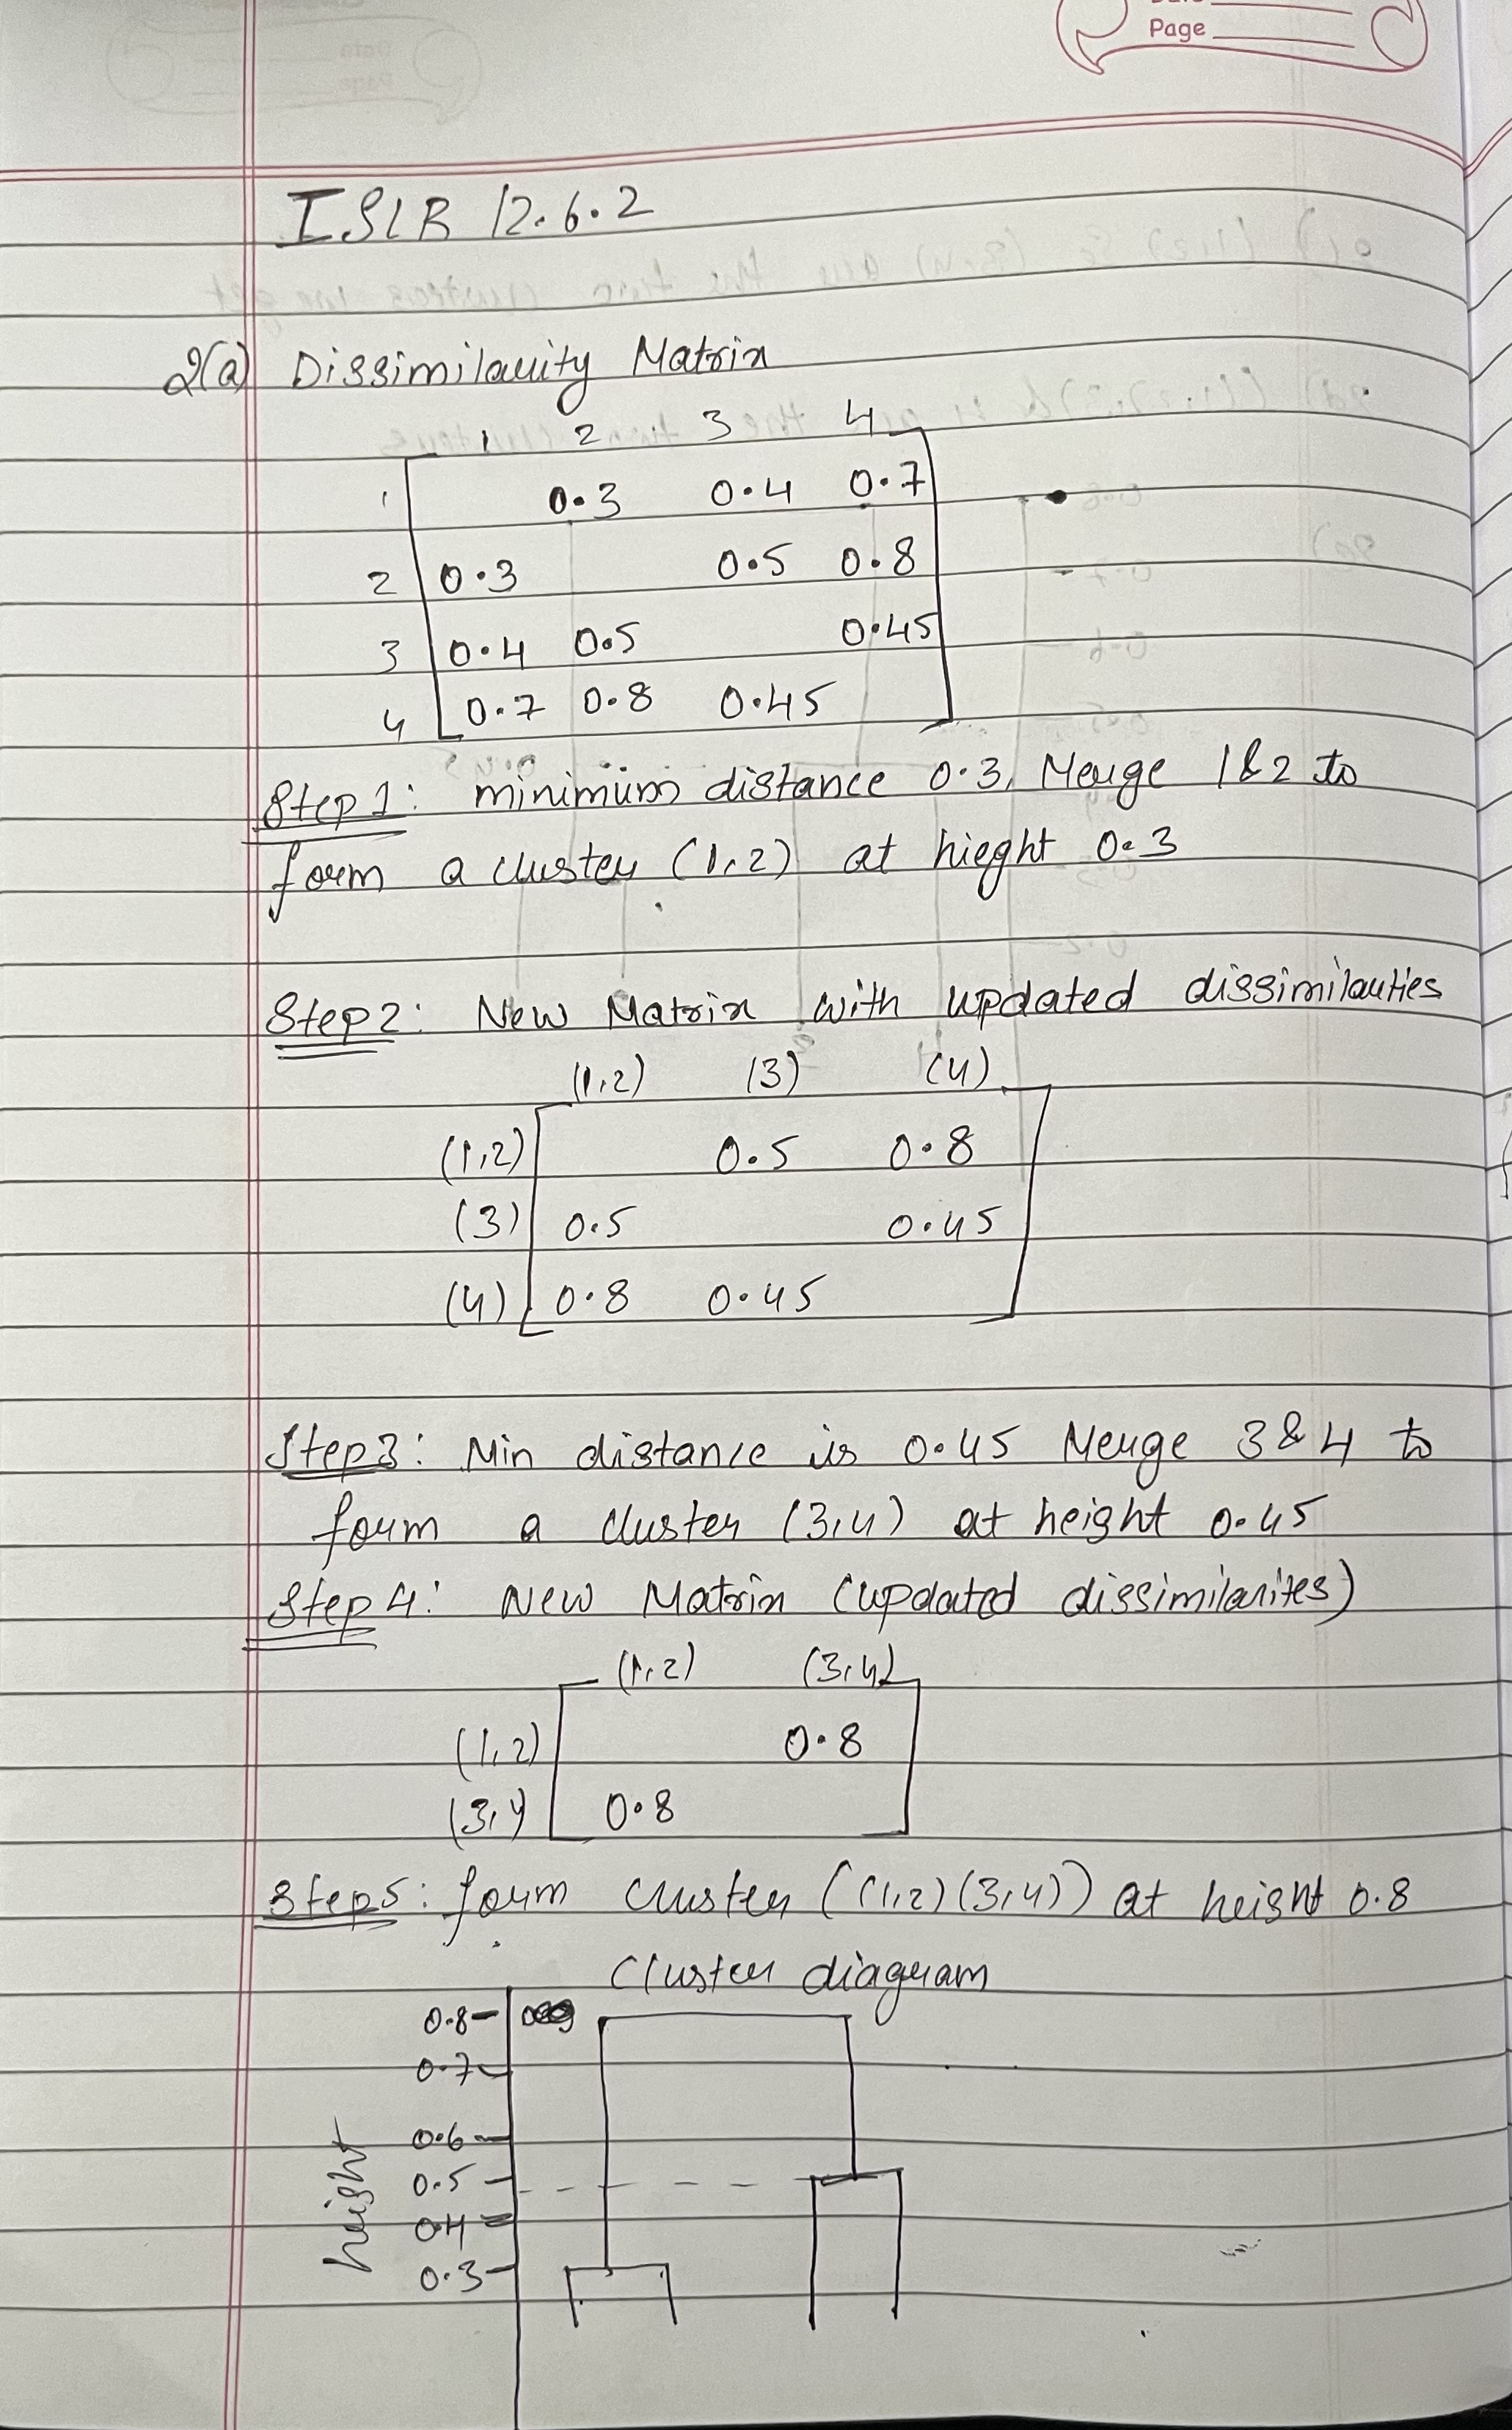

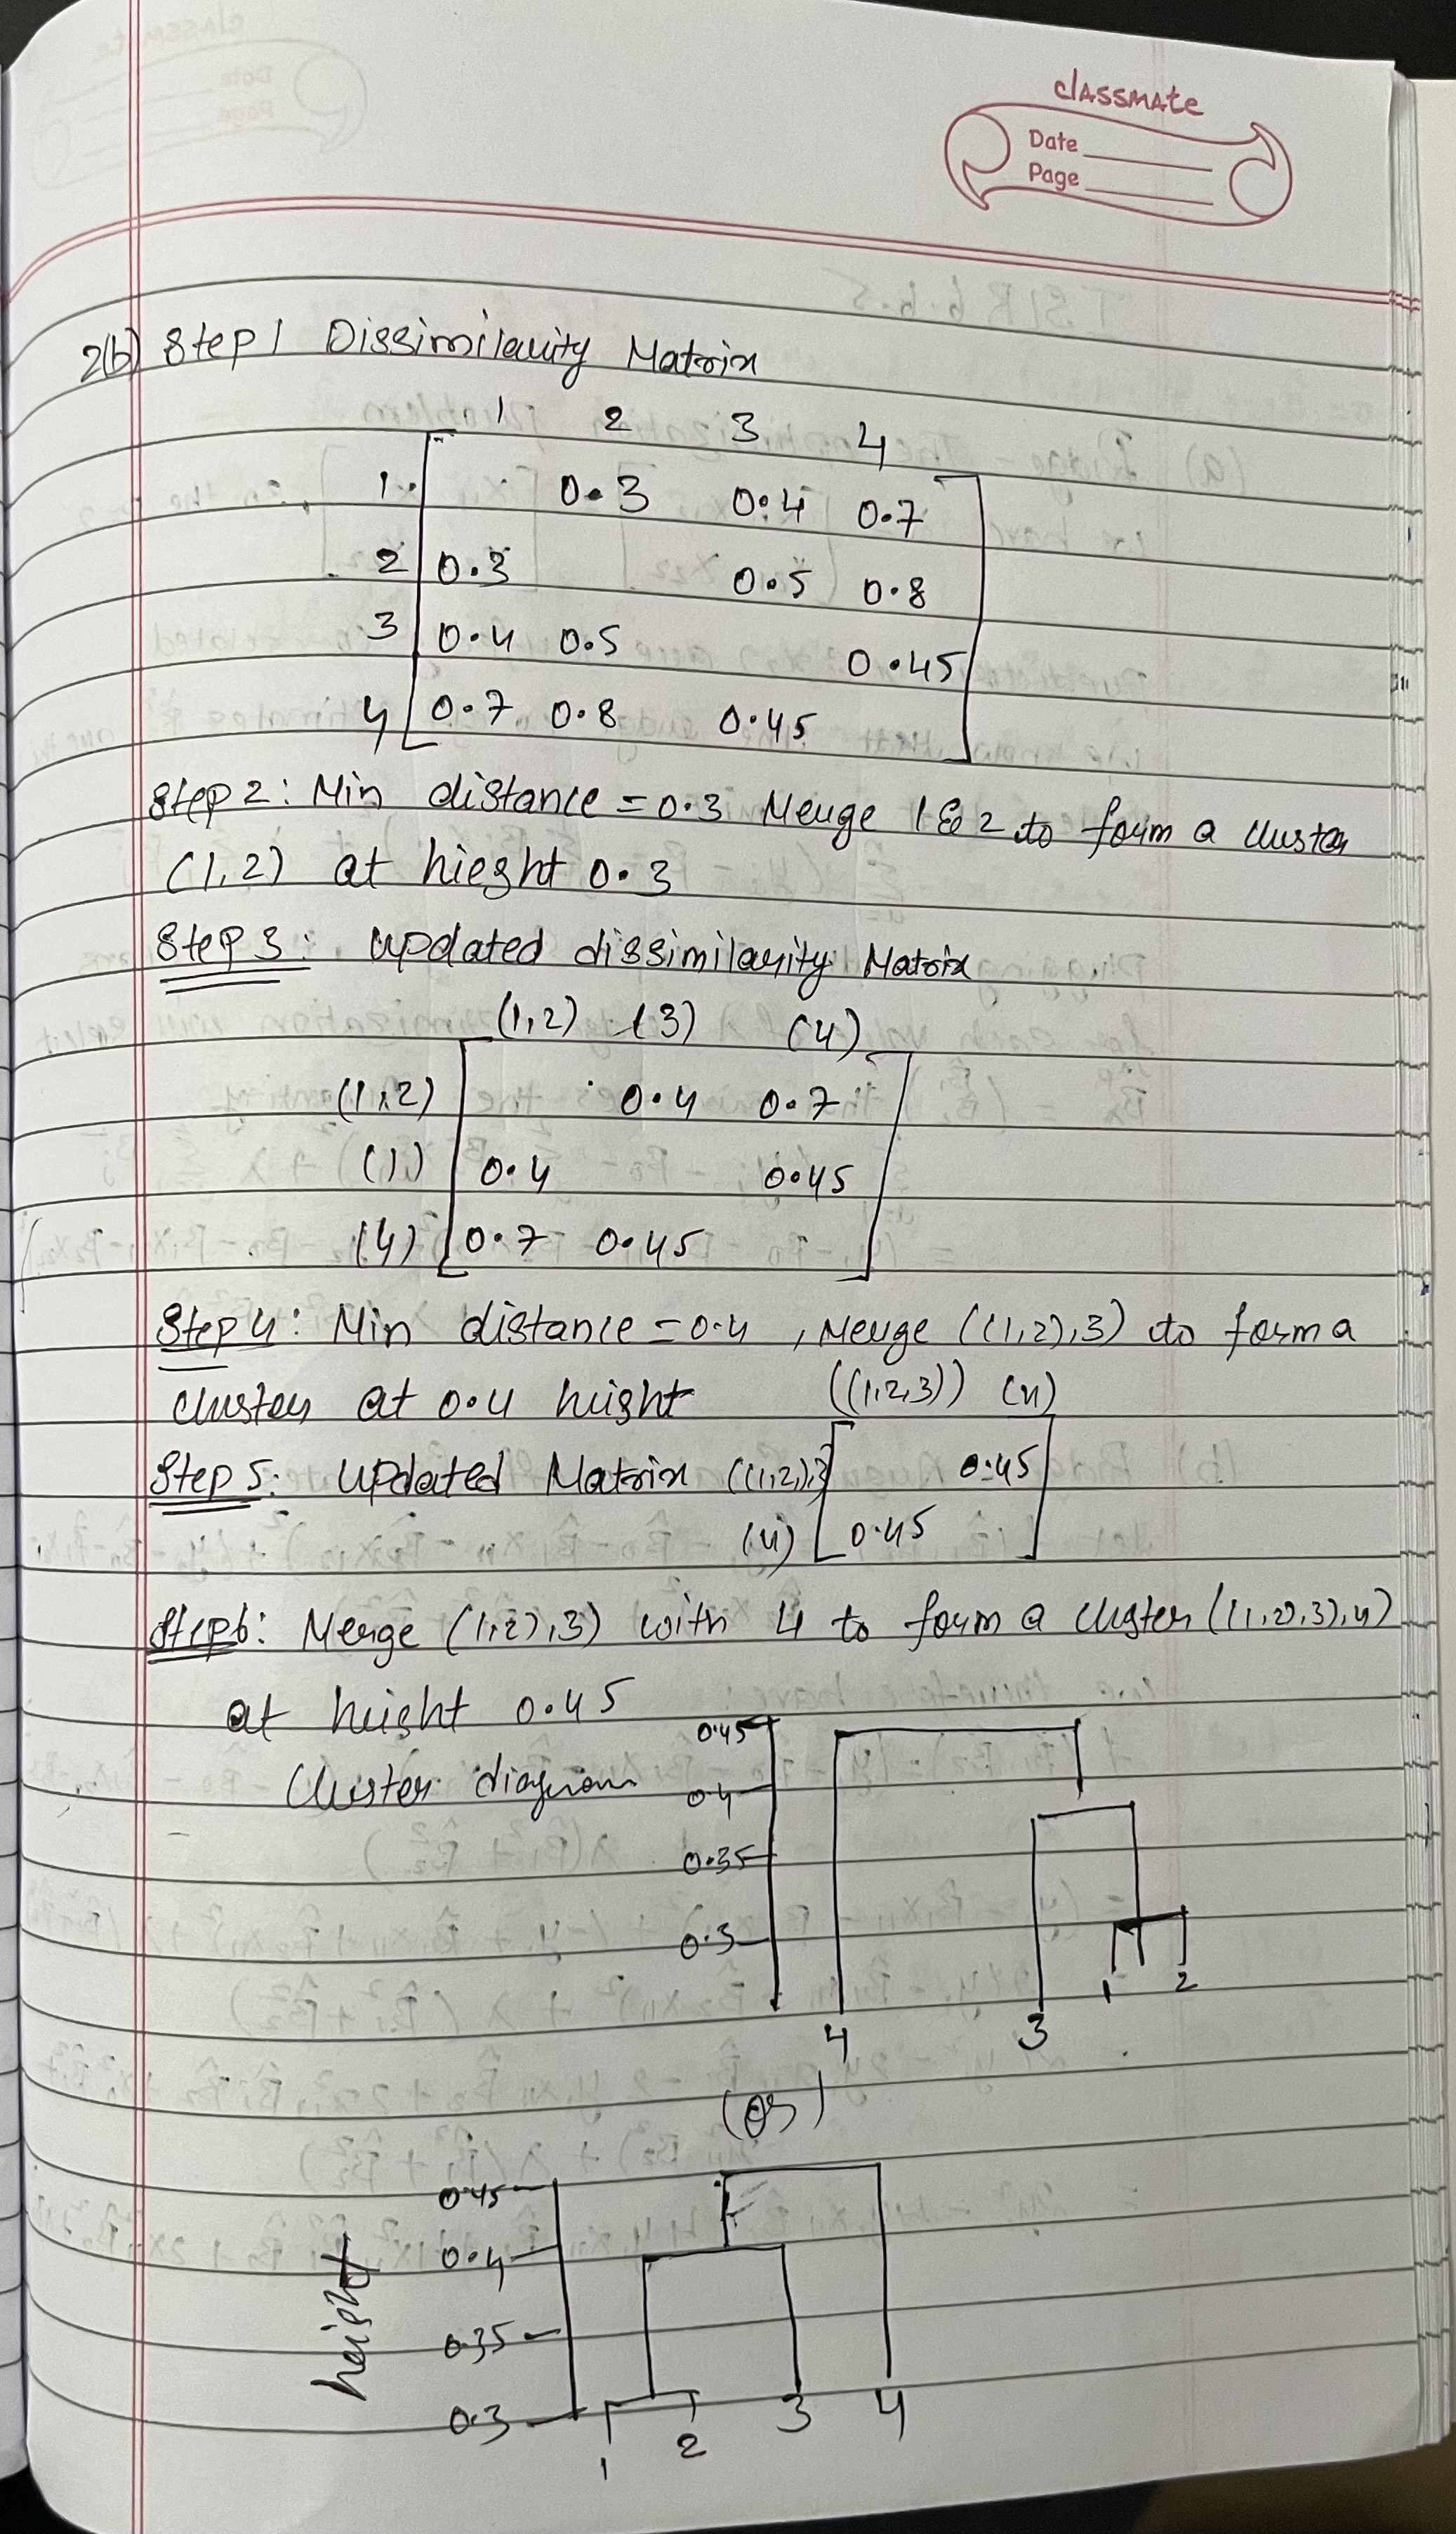

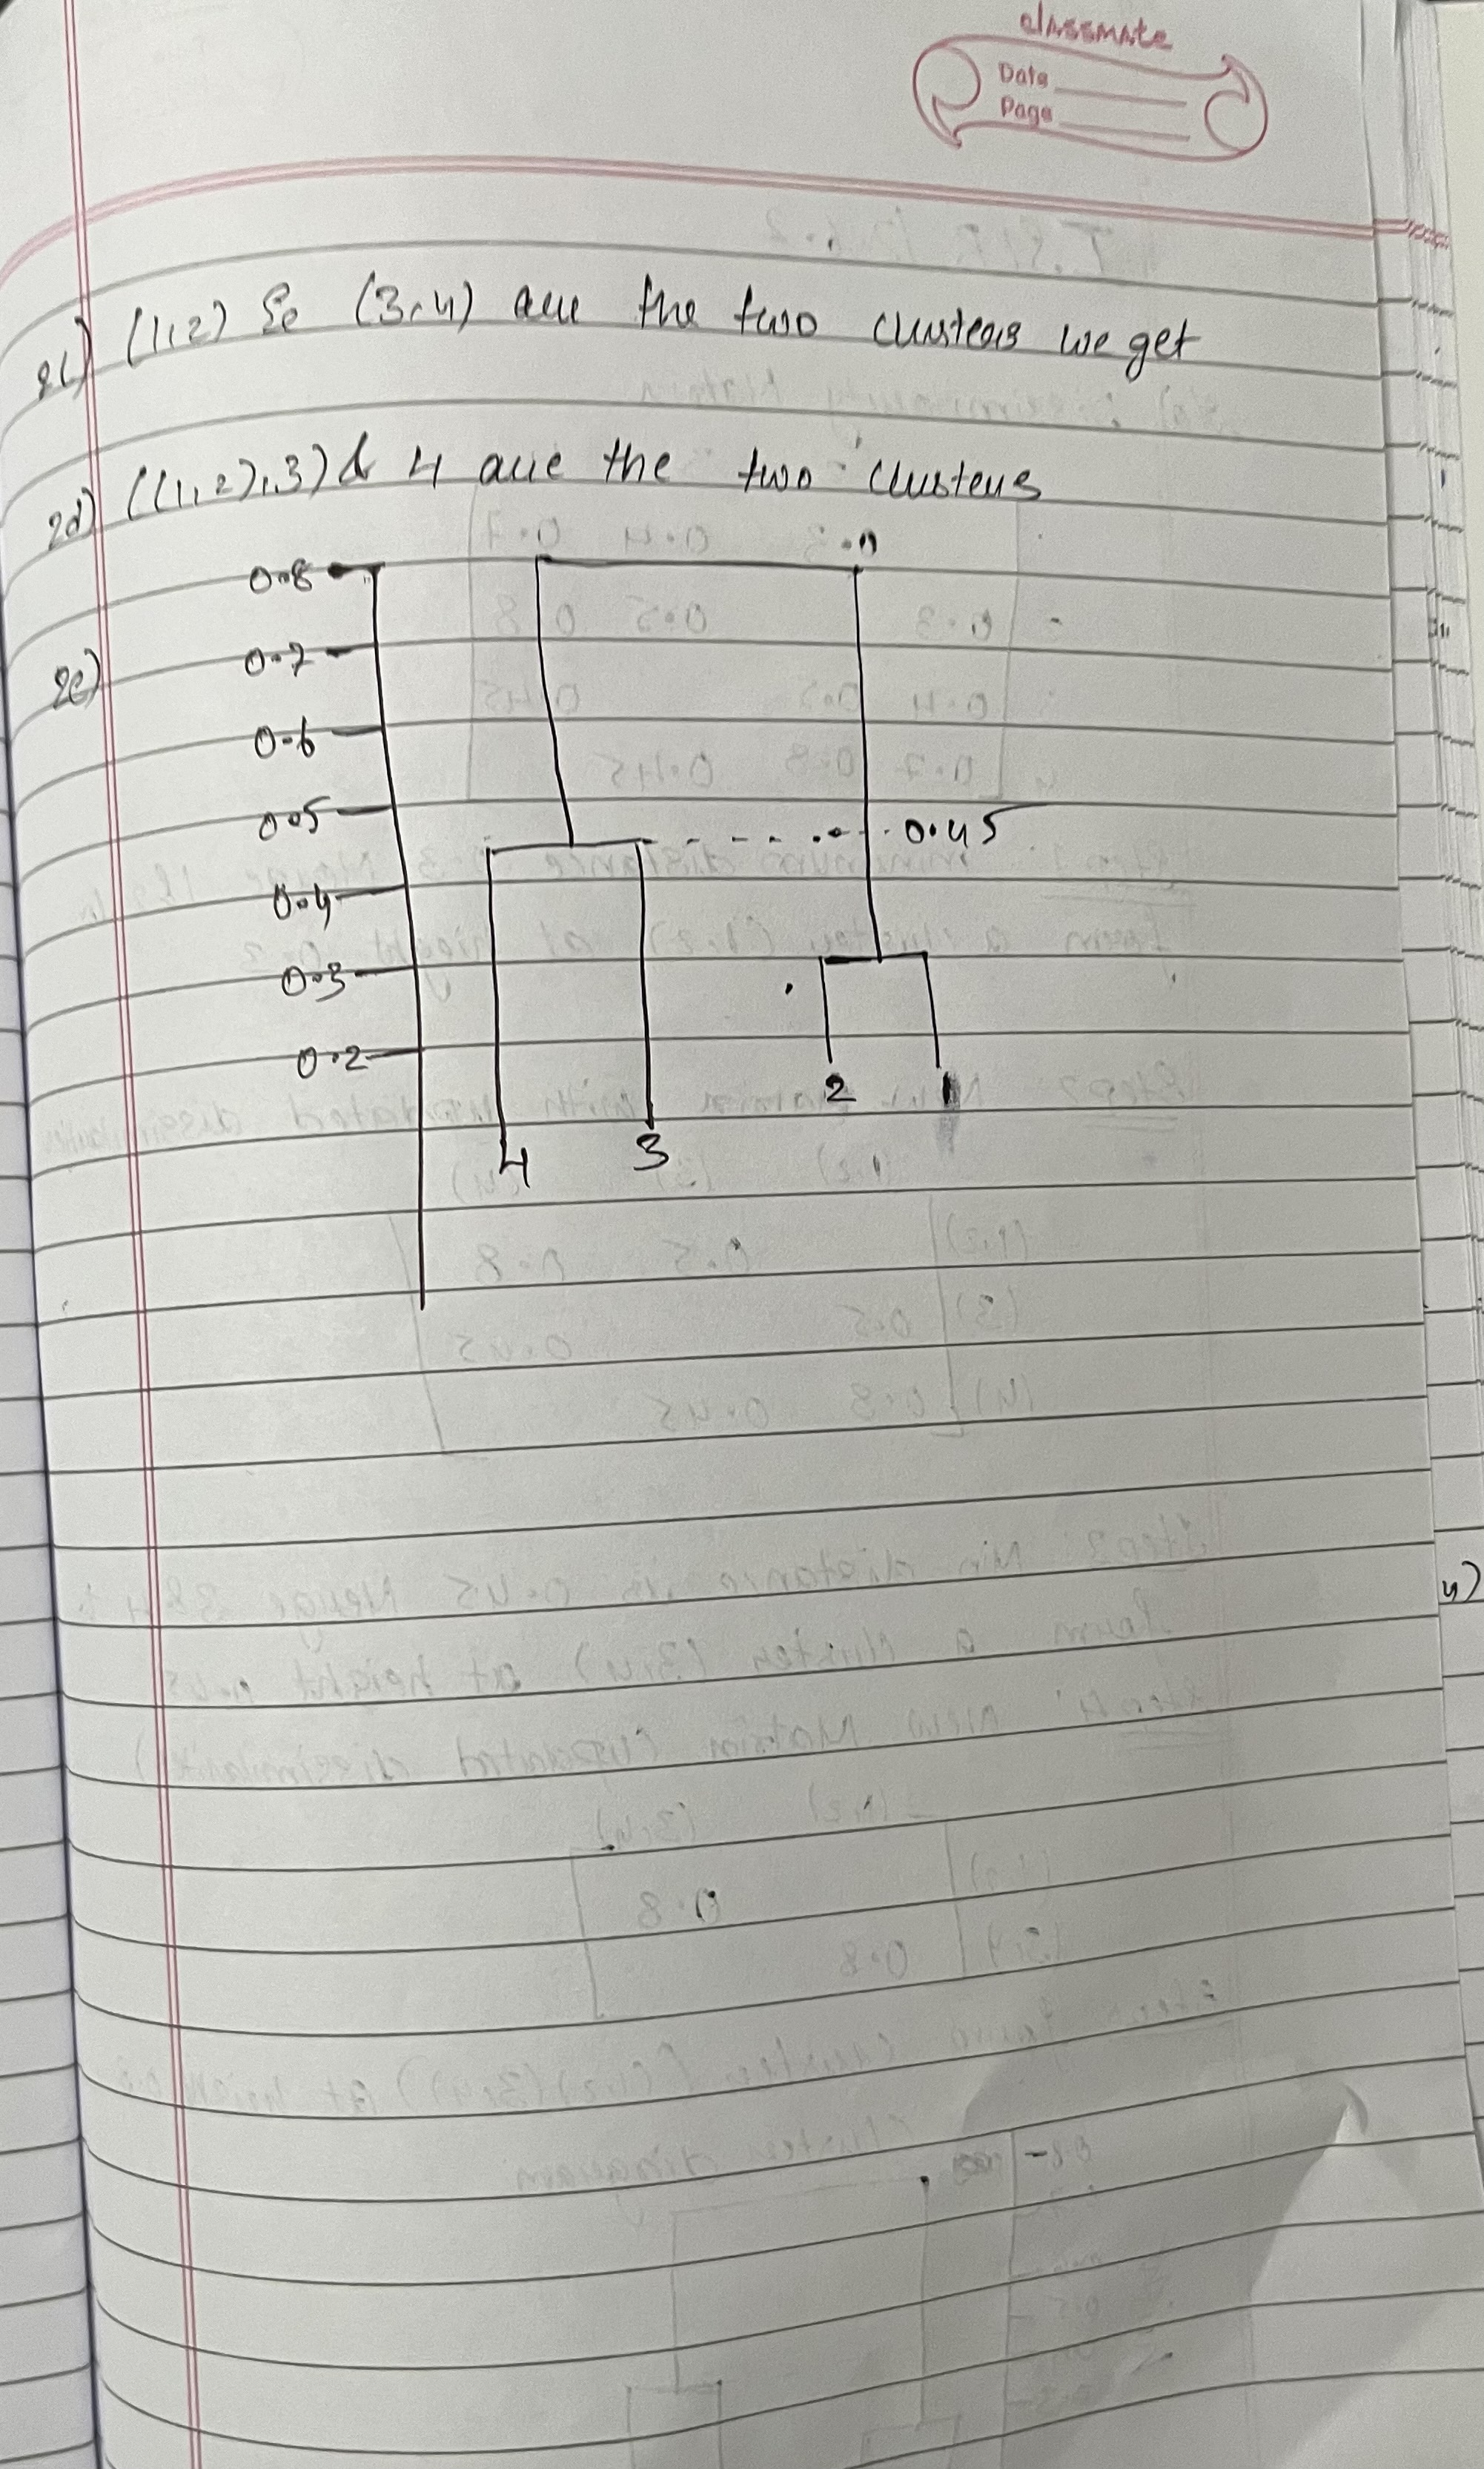

In [32]:
# !pip freeze > requirements.txt